In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from load.helpers import parse_yaml
from graph.plot_helpers import load_simulation_for_all_sectors
from graph.plotting import plot_asset_value_dist, plot_defaults, plot_cummulative_defaults, plot_effect_on_sectors_from_other_sectors

config_dict = parse_yaml("config.yaml")

## Sector level analysis

## 1st Model
parameters:
- distribution: pareto
- alpha: 0.7
- scale parameter: 0.1
- default threshold: 0.0 (if a firm loses all of their equity, they default)
- number of simulations: 1000

In [2]:
sectors_dict = load_simulation_for_all_sectors(config_dict["outputs"]["simulations"], "2022_10_28_182213", config_dict["lists"]["sectors"])

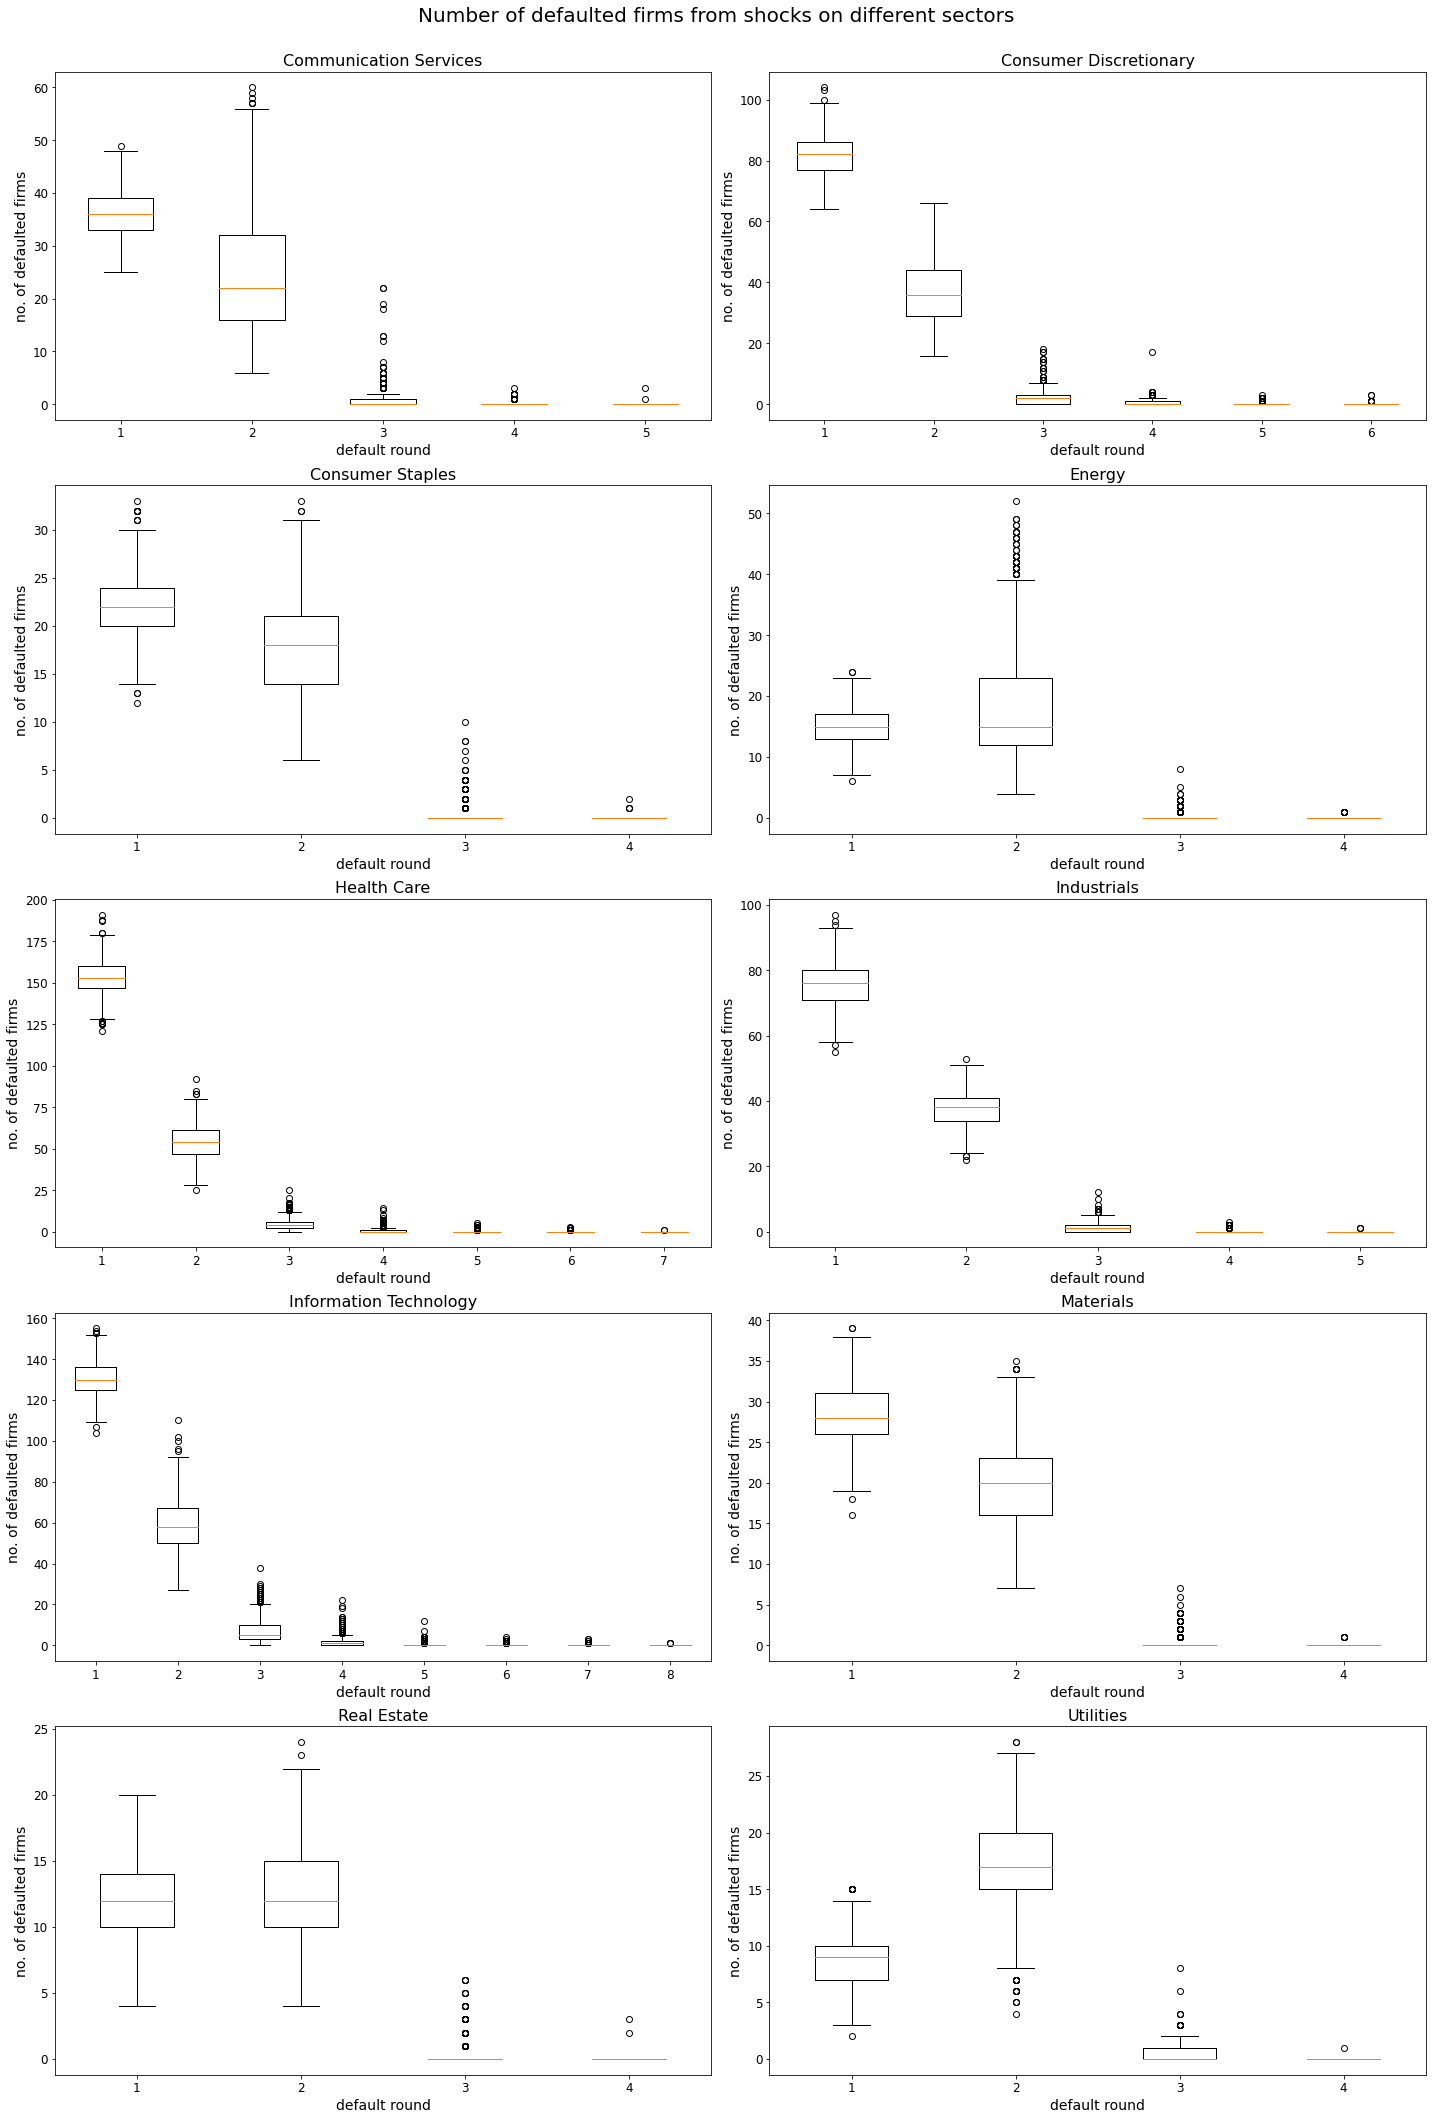

In [4]:
fig = plot_defaults(sectors_dict, "all", 'rounds')

The above graph tells how many rounds a shock on each sector lasts with exact information on the failing companies in each round. We can see that shocking the IT sector lasts longest, 8 itertations, closely followed by the health care sectors shock that lasts for 7 iterations. In most cases the defaulting firms show an evanescent process where around the 3rd round there are no significant new failures. It is interesting to highlight that some sectors result in similar number of defaultinf firms in the second round as the failing firms in the initial shock phase, namely the Real Estate and the Energy sectors.

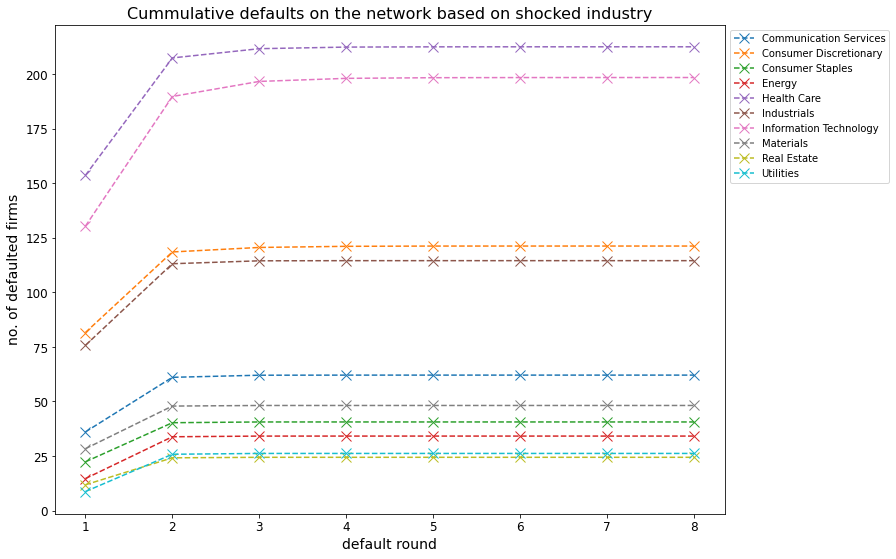

In [3]:
fig = plot_cummulative_defaults(sectors_dict)

The above plot shows the total number of defaulting firms based on each shocked sector. There is no surprise that the two most infulential sectors are the Health Care and the IT, which are the two largest sectors both based on asset value and node count. The whole plot displays the order of the previously presented (in the describe_graphs notebook) ranking based on sector size. We can also see that the largest number of defaults appear in the first two iterations.

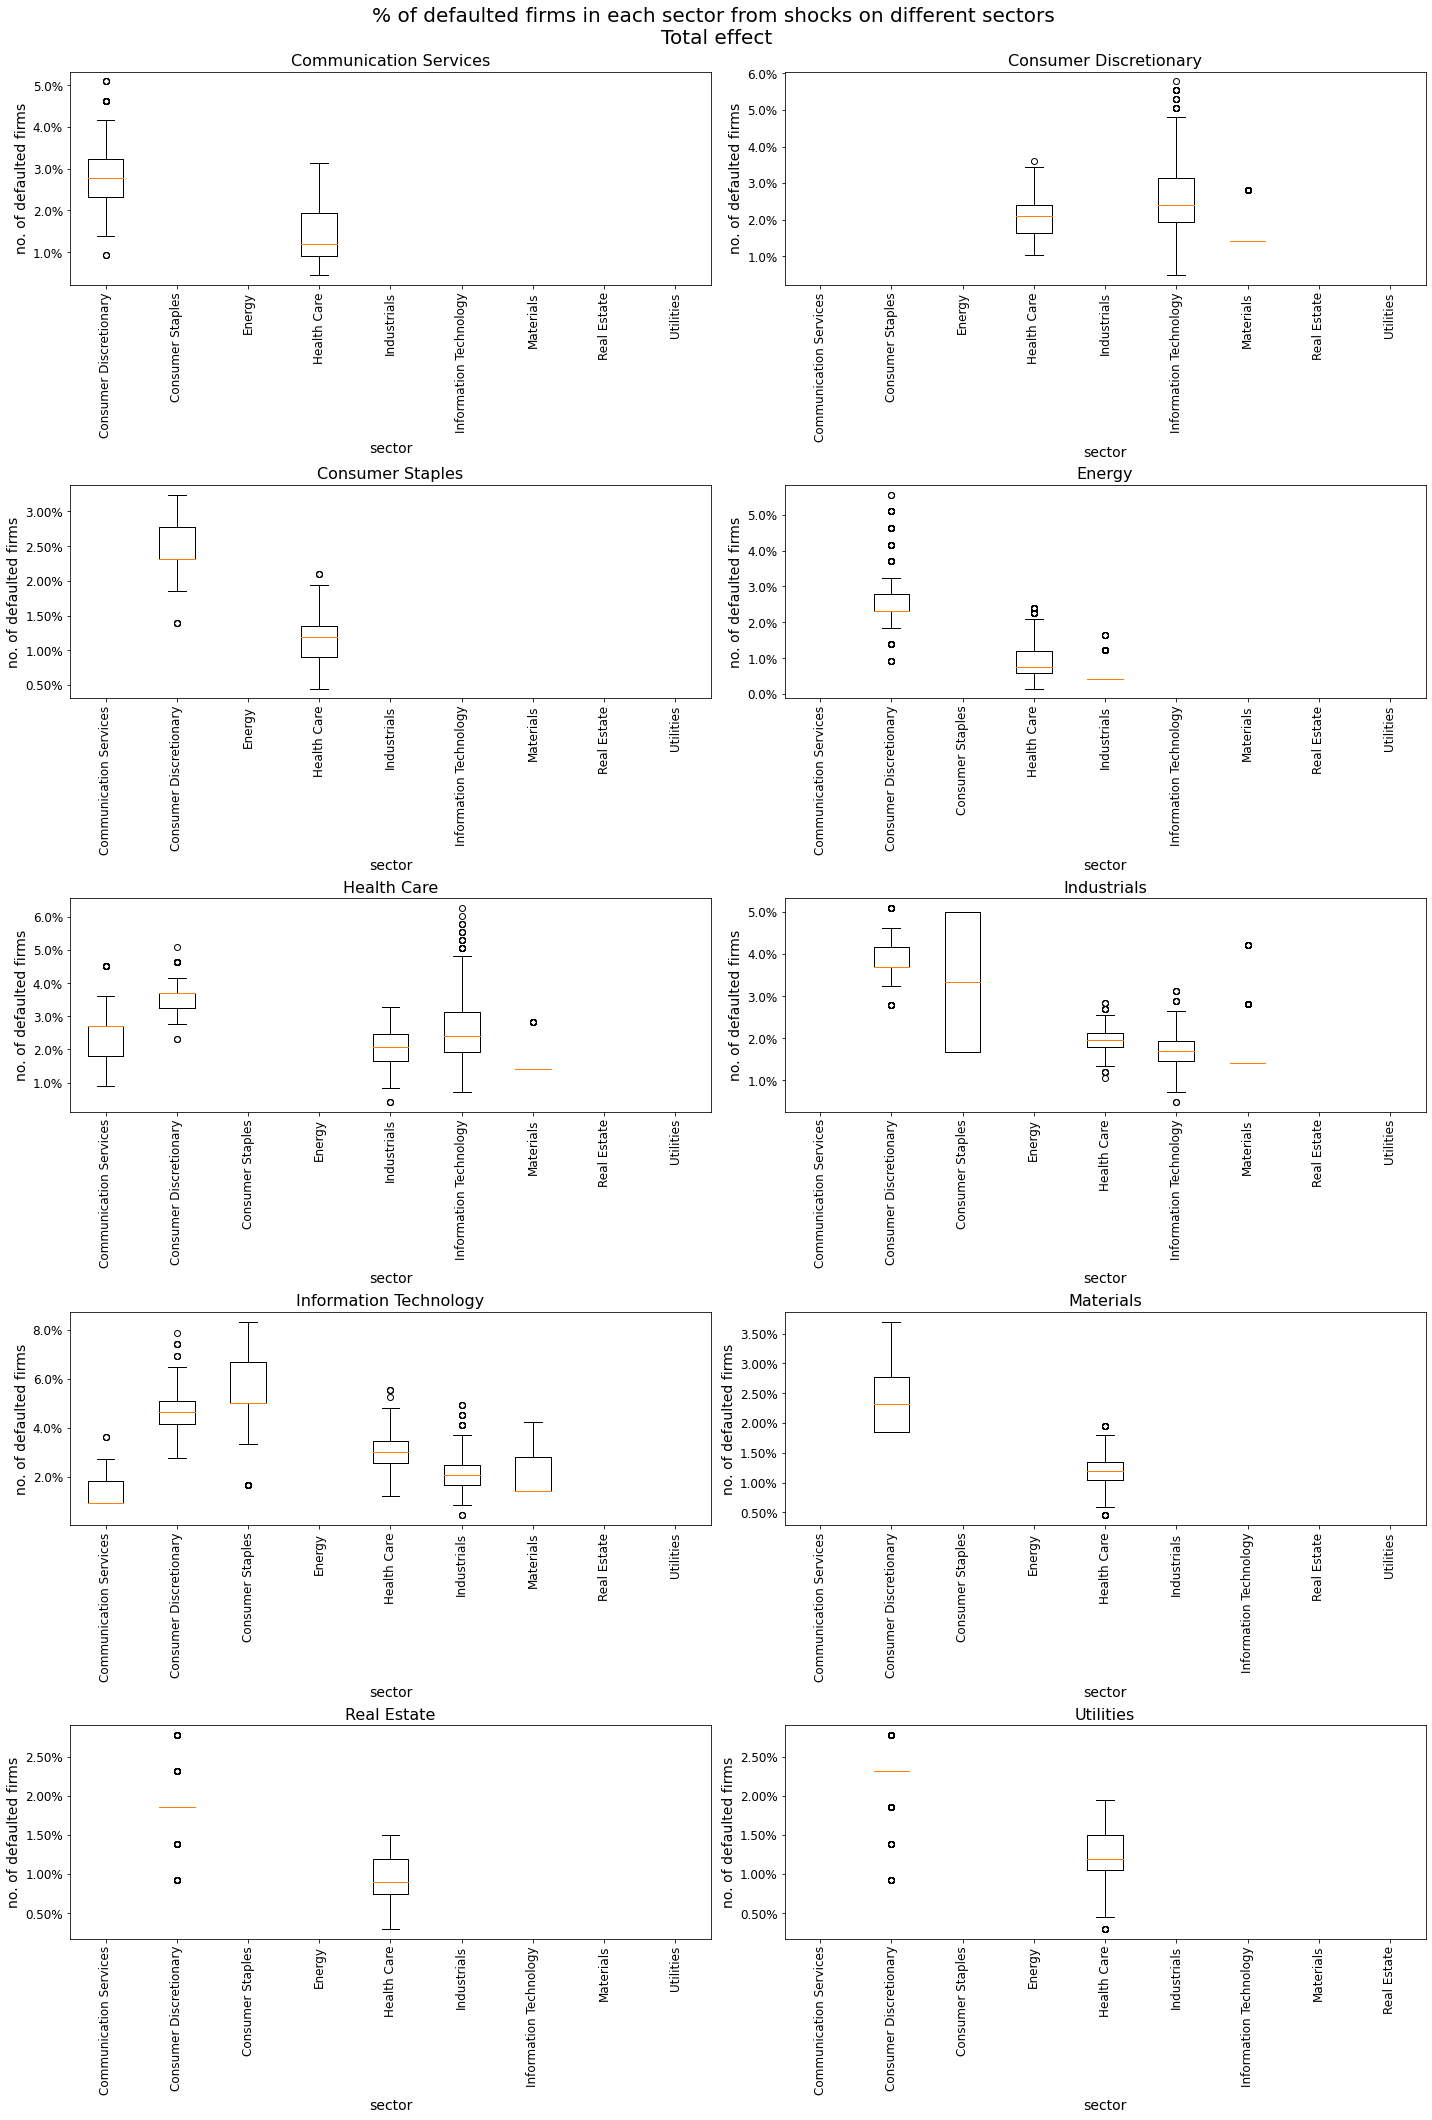

In [12]:
fig = plot_defaults(sectors_dict, "all", 'sectors_total')

The above plot shows how different sectors are affected from a shock hitting one specific sector. From the subplots we can see that the IT sector is the most influential sector as in case a shock hits that sector, significant number of firms default in the Comm. Services, Consumer Disc, Consumer Staples, Health Care, Industrials, and even in the Materials sector. In this structure health care sector is also influential on multiple sectors although industrials also affects numerous other sectors. We can see that the least influential sectors are again the smallest ones.

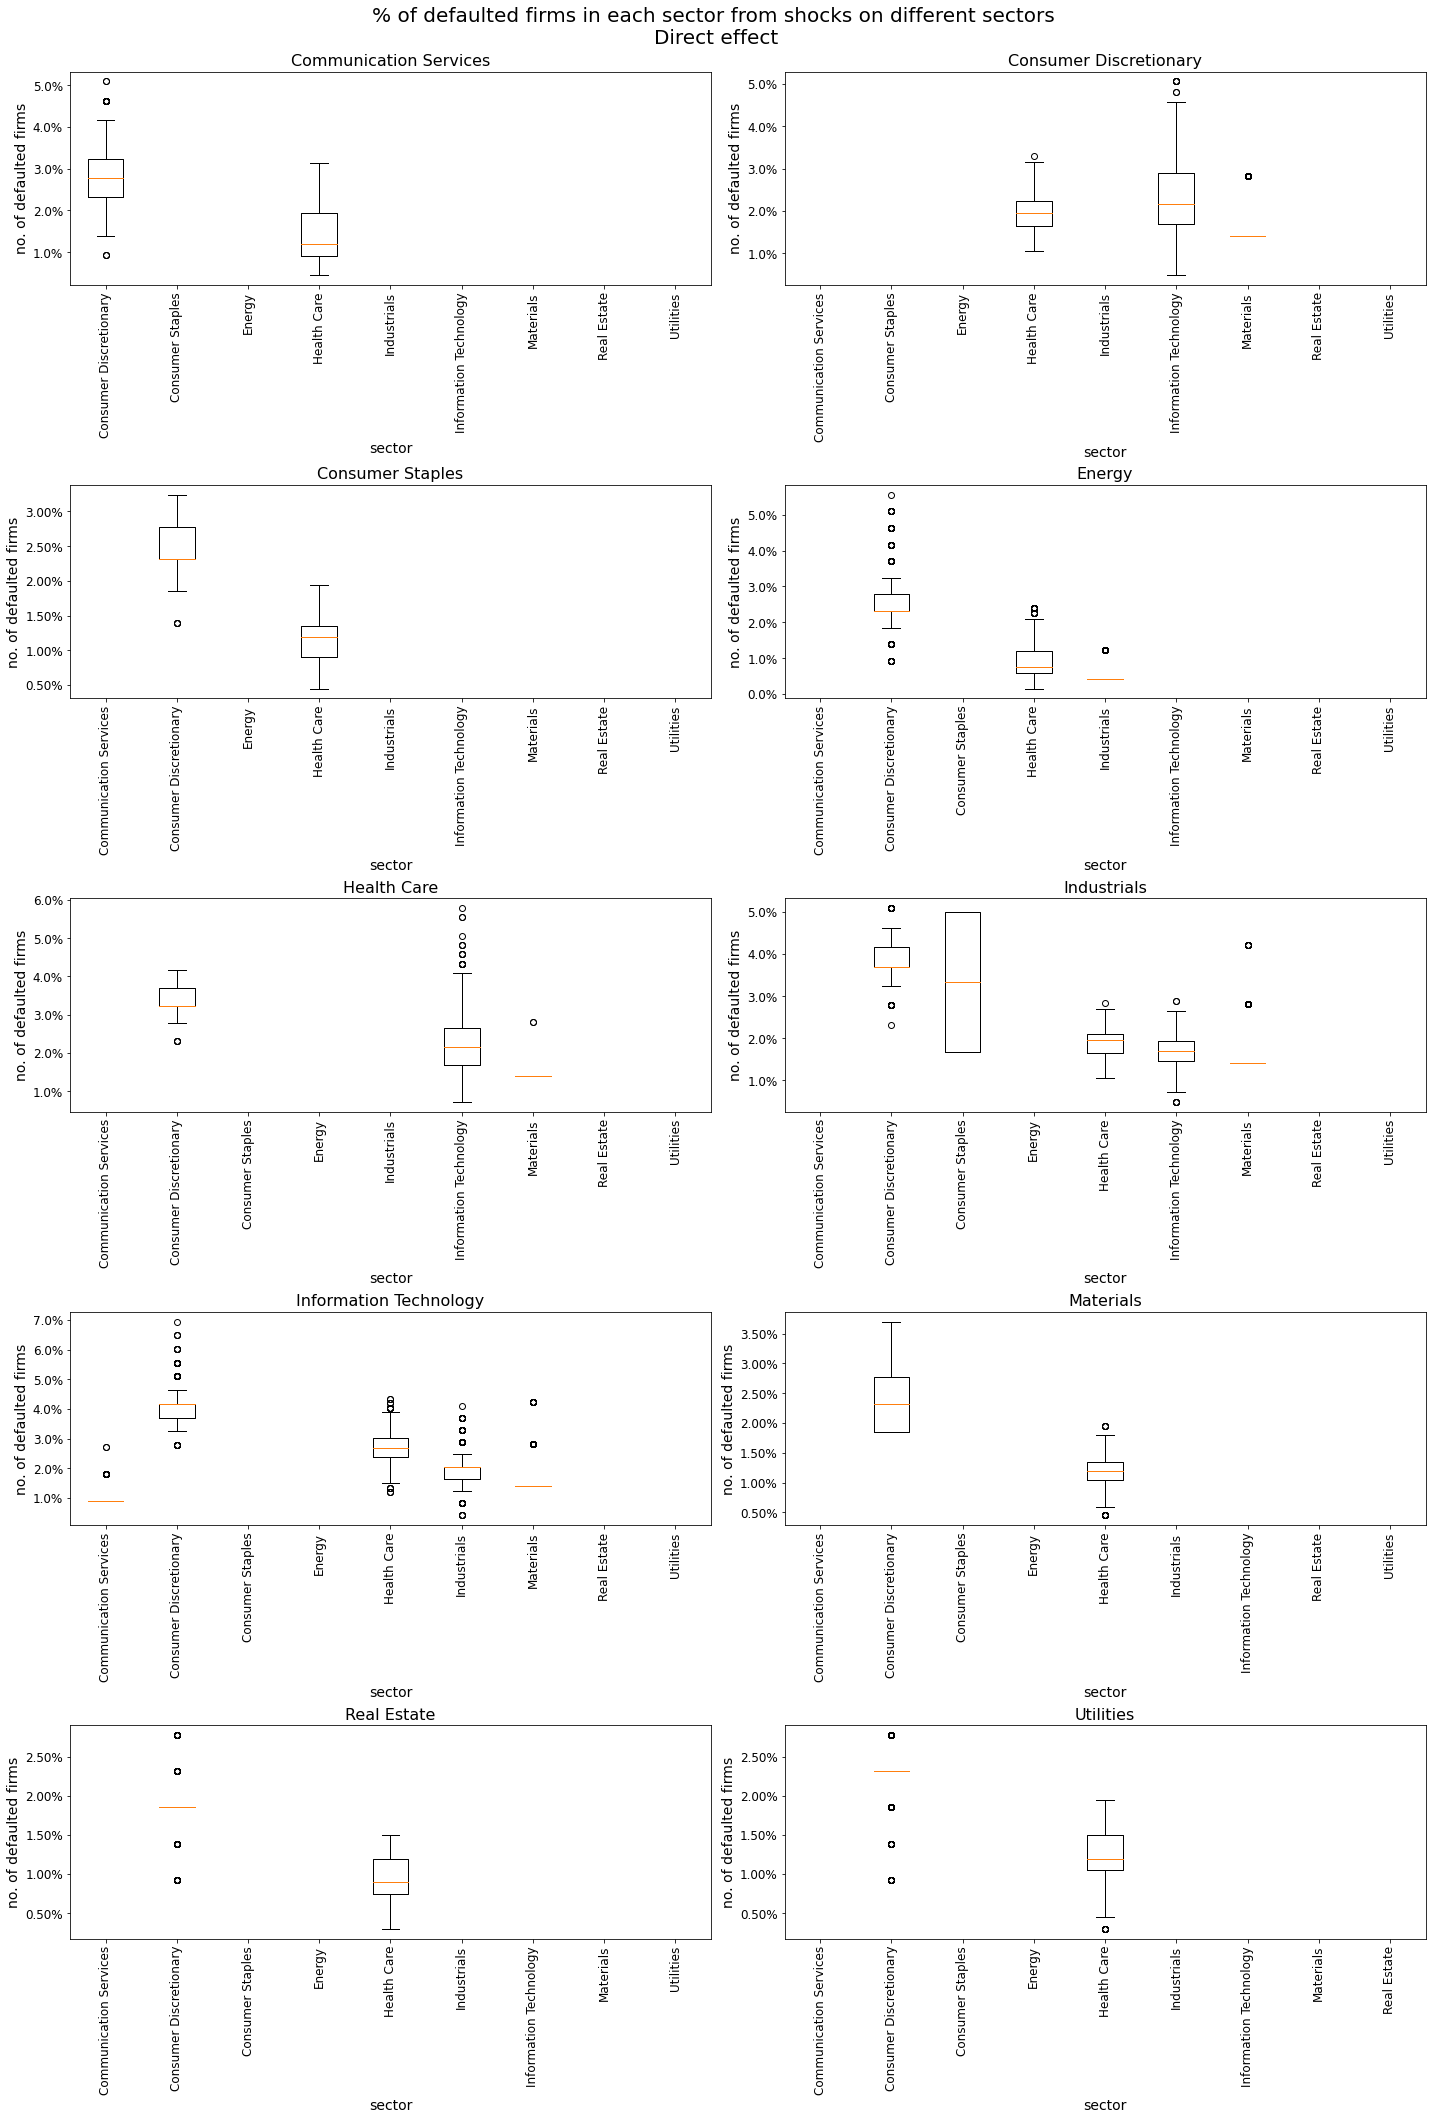

In [13]:
fig = plot_defaults(sectors_dict, "all", 'sectors_direct')

The above plot shows the direct exposure of each firm to the one shocked sector in a sense that only the defaults in the second iteration are considered. For example, for the defaults in the consumer disc sector the IT sector has the highest exposure with an average ~2.5% of IT firms defaulting inmediately after the consumer disc sector suffers a shock.

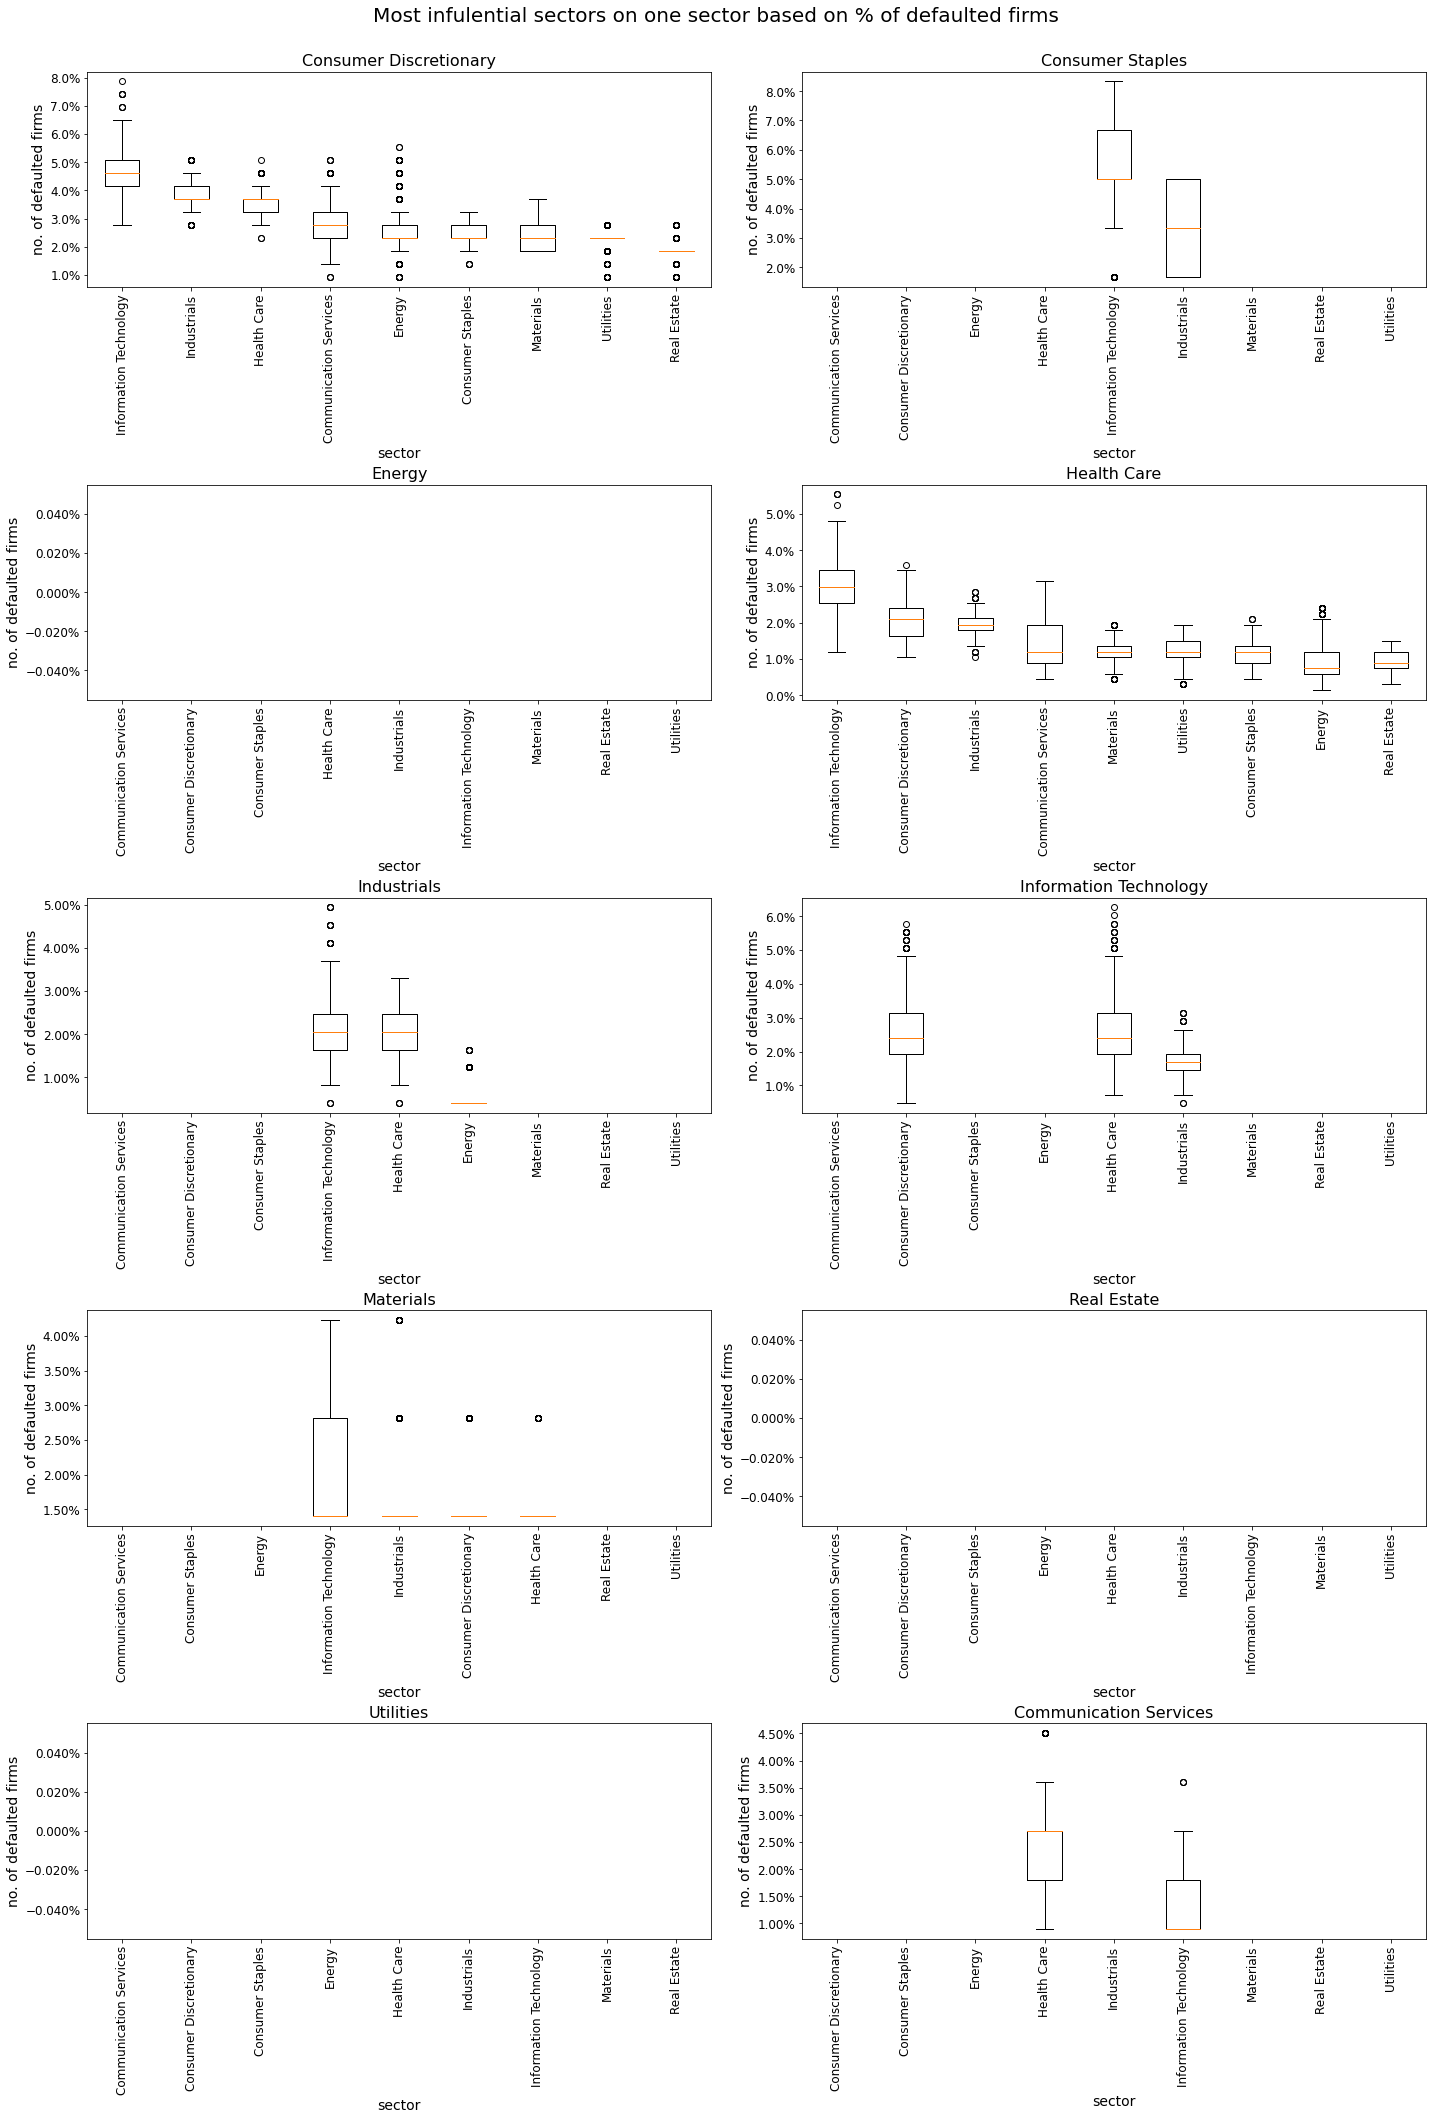

In [3]:
fig = plot_effect_on_sectors_from_other_sectors(sectors_dict)

The above plot is the reverse of the previous two in a sense that the x axes show the sector that suffers a shock and the y axes show the effect of that sector's shock on the sector that is in the title. That is useful to identify the largest threats for each sectors. For example, an interesting result is that although we said that in general the IT is the most influential, the commnunication services sector is more exposed to the health care sector. In most cases though the IT is the biggest threat. An other surprising result is that given the above presented model configurations, utilities, real estate and energy sectors are not exposed to any other sector's failures except their own. To put that differently, the shocks do not reach the three smallest sectors, which is not obvious for the first thought. It is necessary to examine the results of other simulations with more loose failure treshold.

## 2nd Model
parameters:
- distribution: pareto
- alpha: 1.8
- scale parameter: 0.1
- default threshold: 0.0 (if a firm loses all of their equity, they default)
- number of simulations: 1000

In [4]:

sectors_dict2 = load_simulation_for_all_sectors(config_dict["outputs"]["simulations"], "2022_10_27_220334", config_dict["lists"]["sectors"])

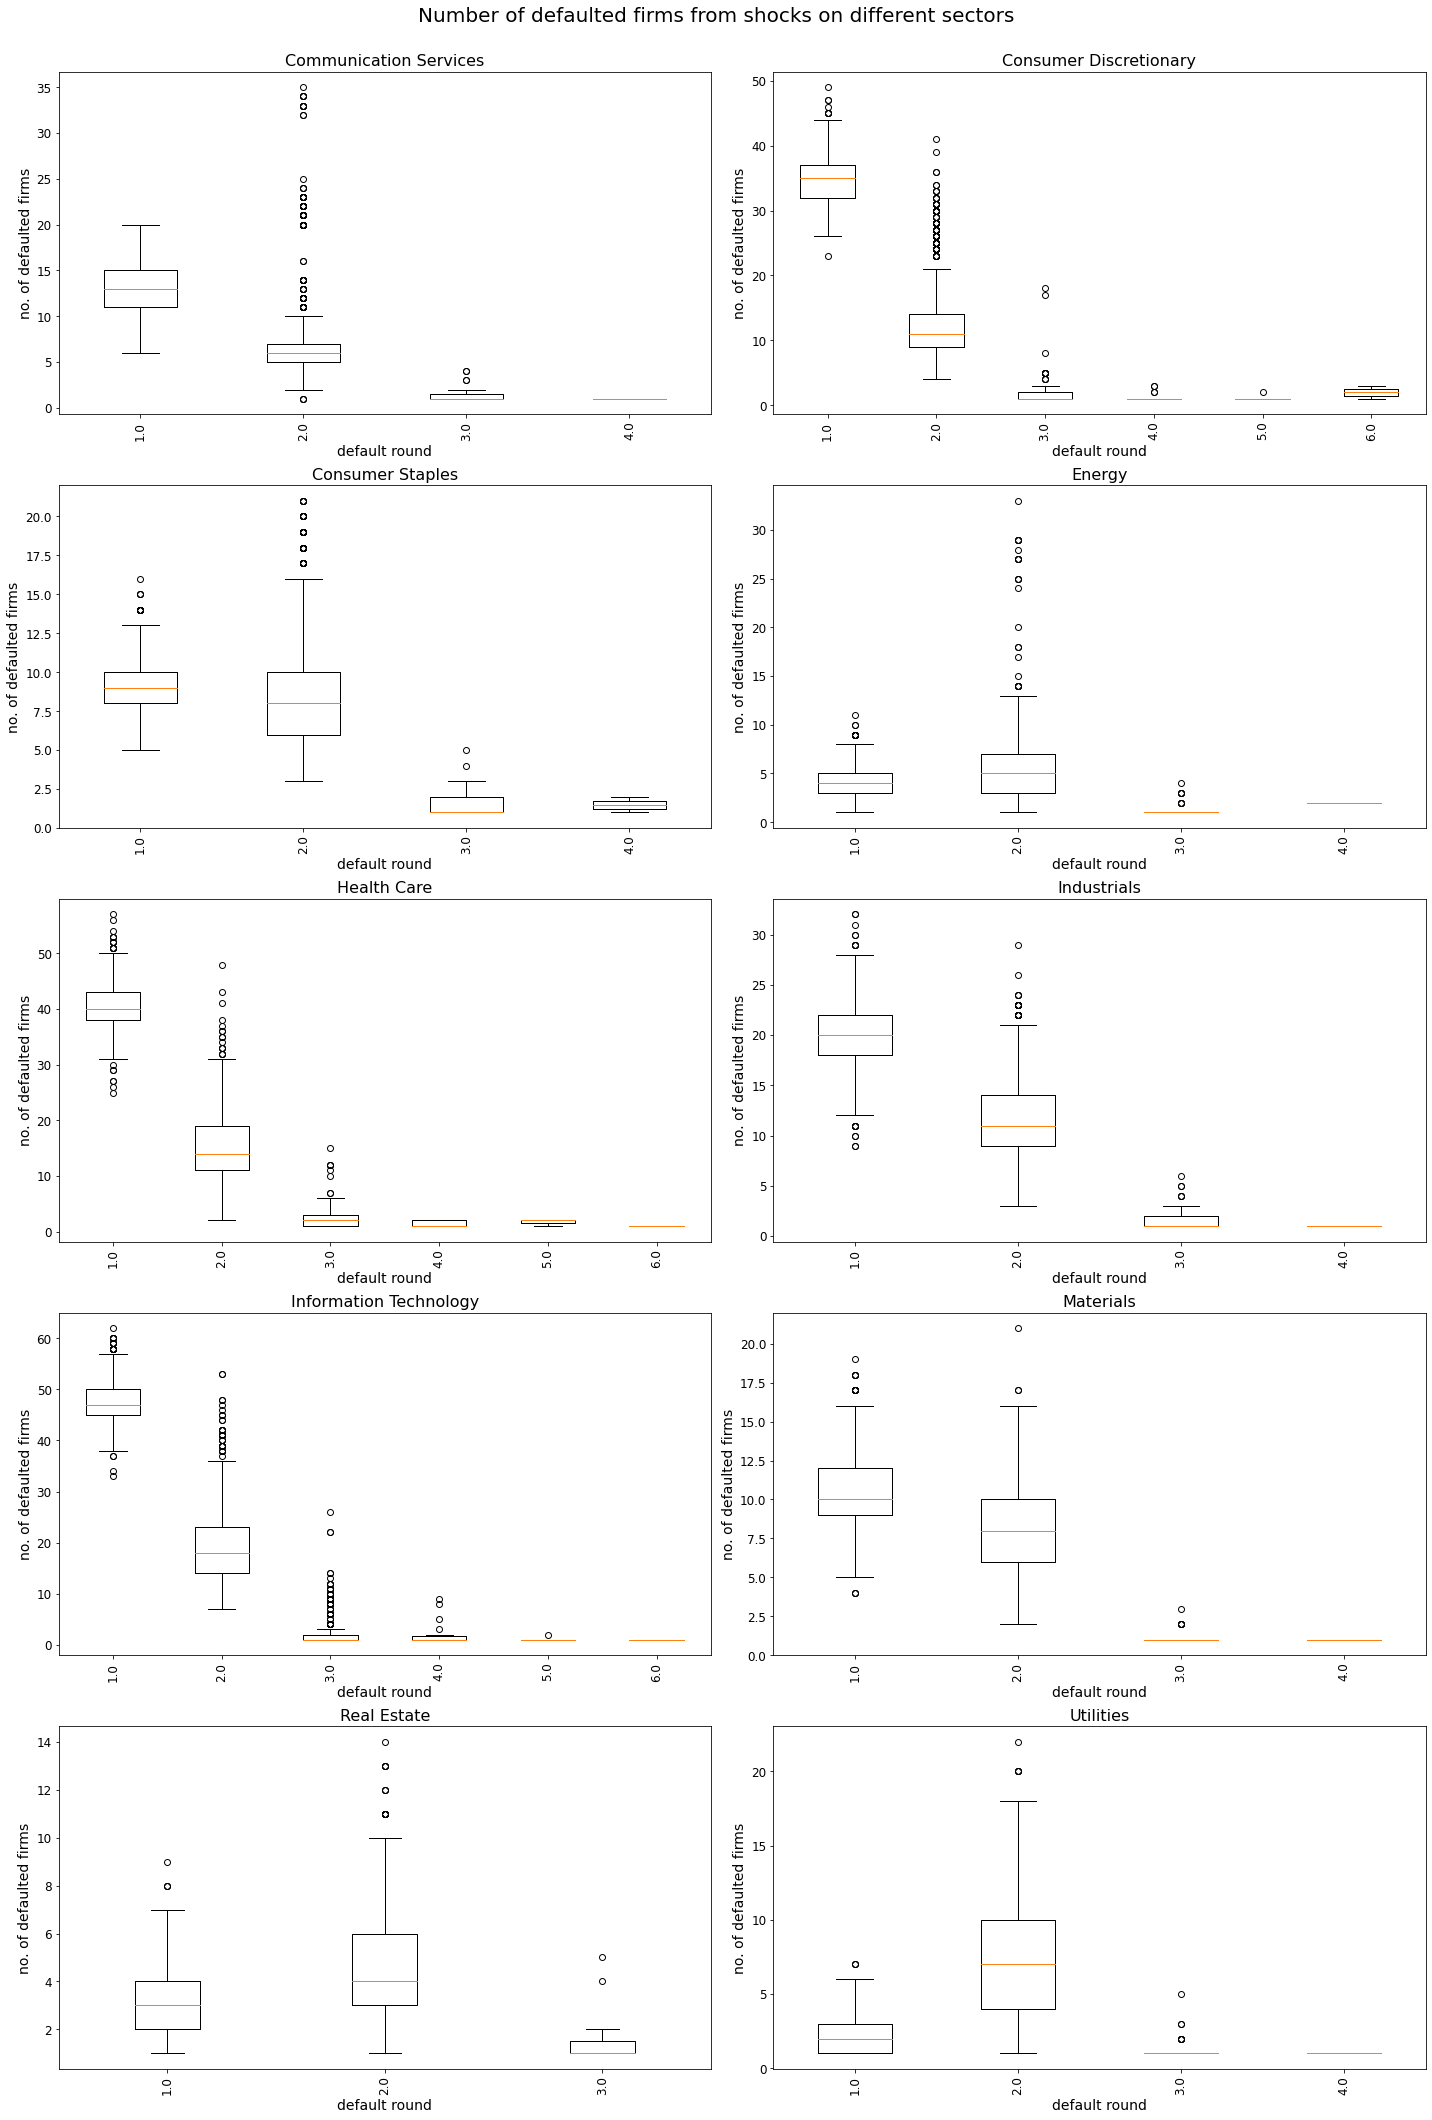

In [4]:
fig = plot_defaults(sectors_dict2, "all", 'rounds')

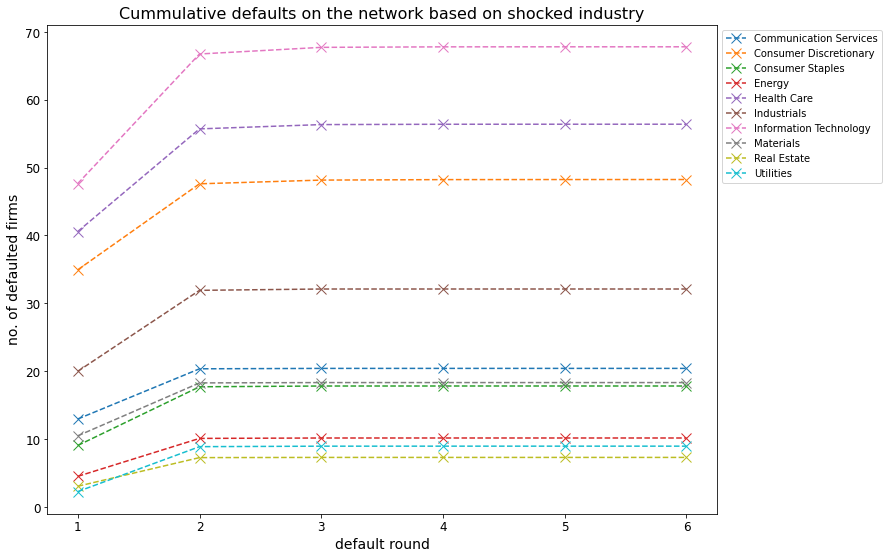

In [5]:
fig = plot_cummulative_defaults(sectors_dict2)

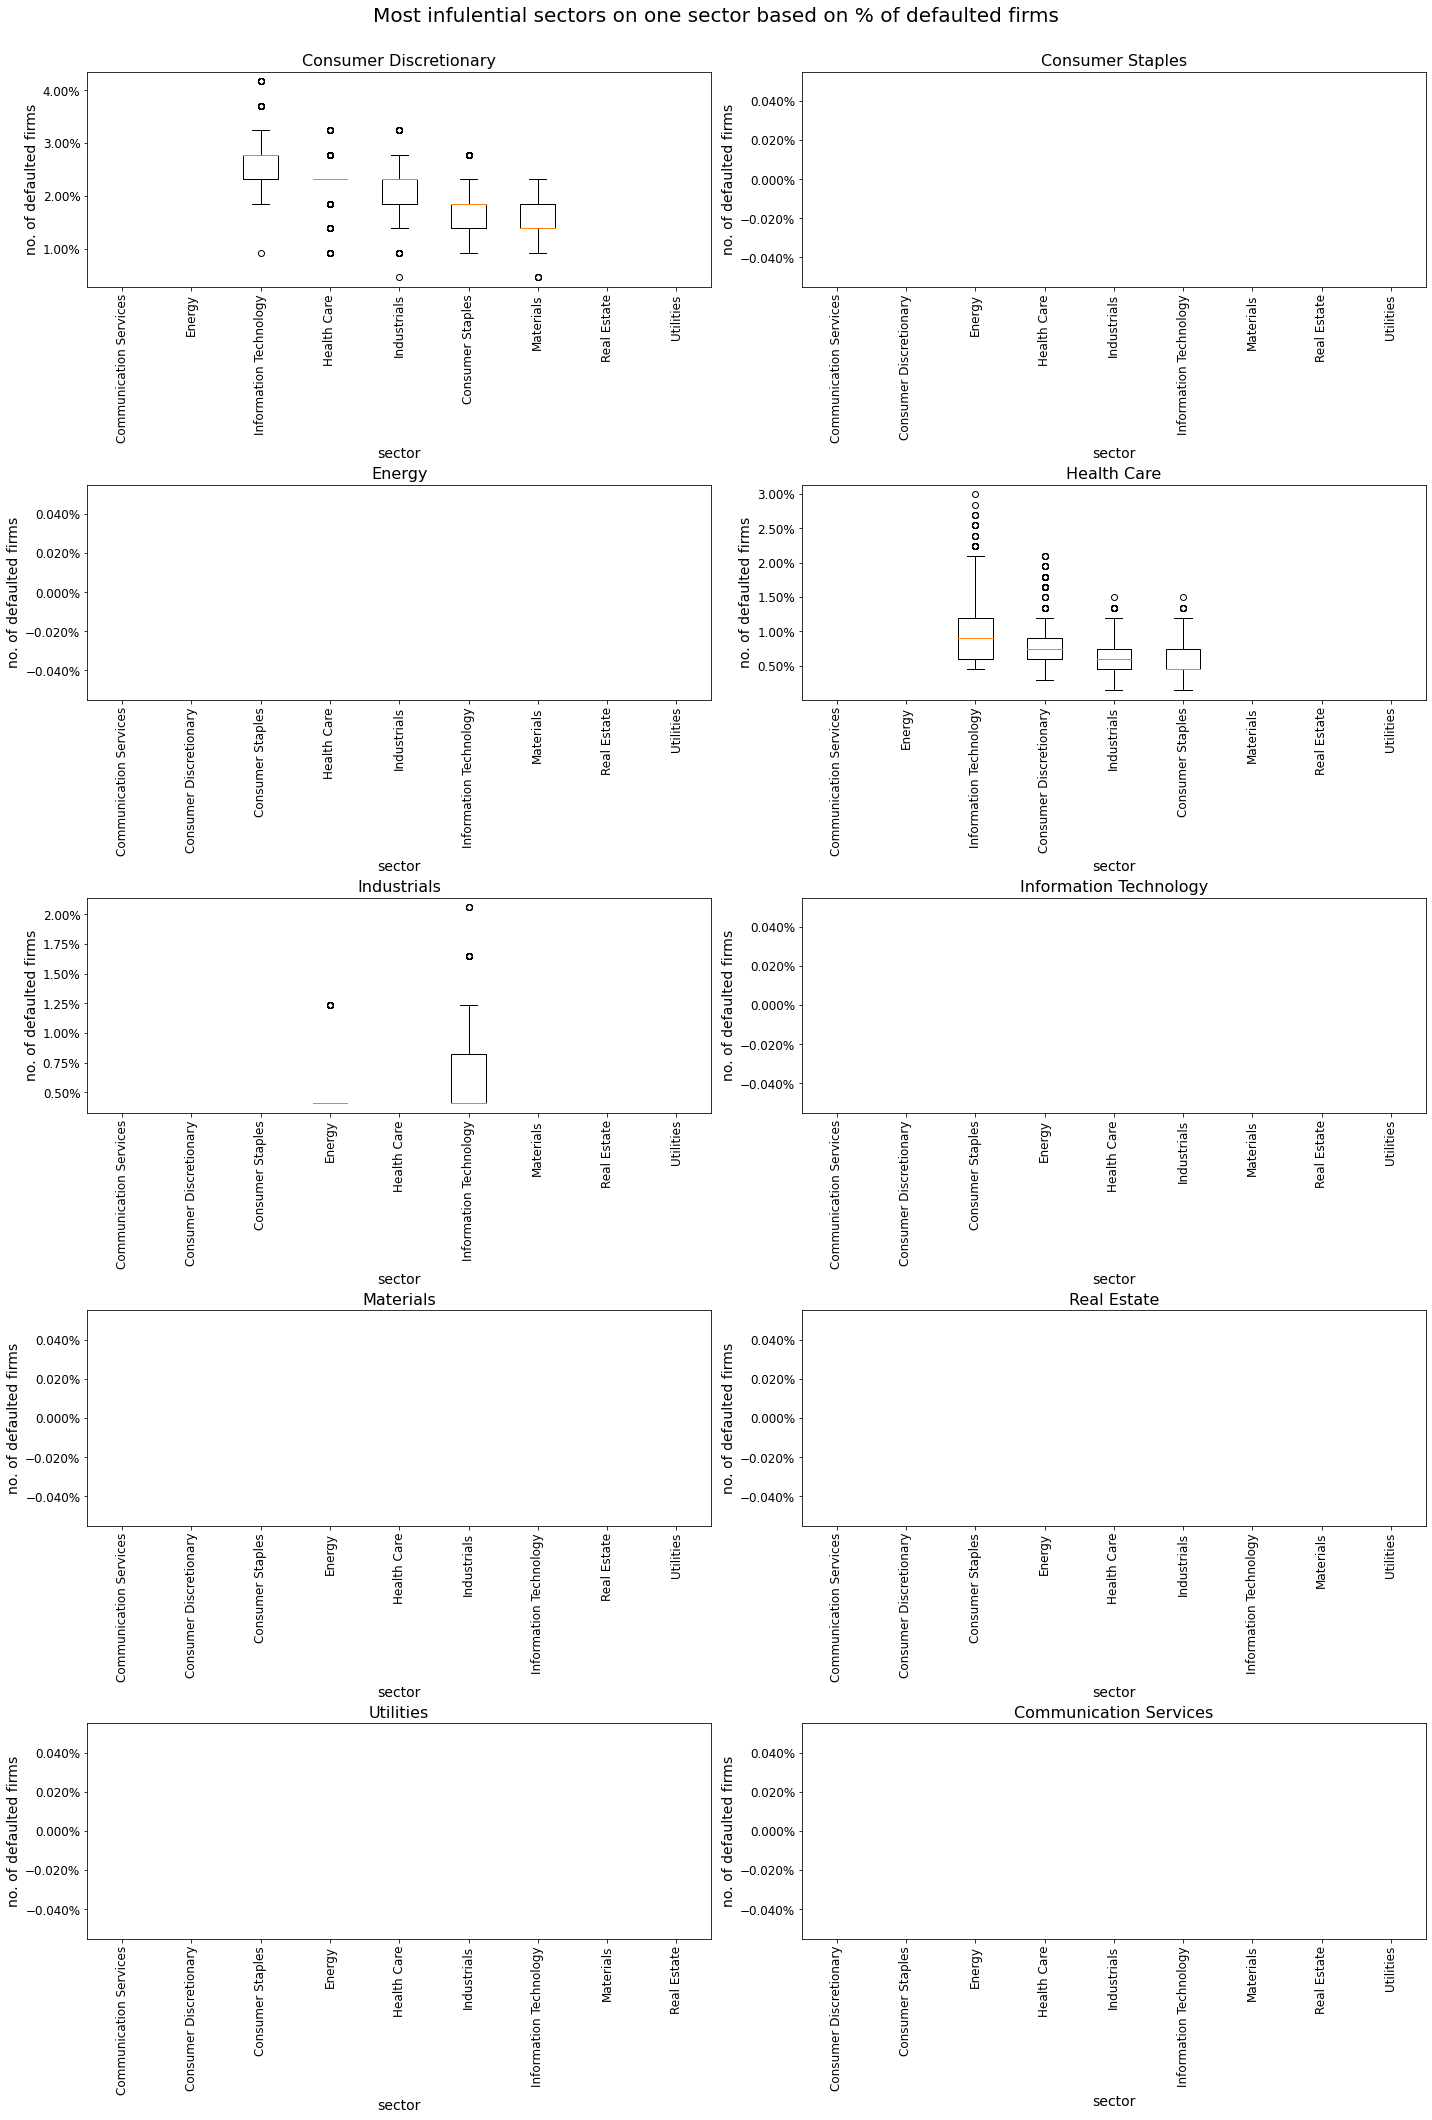

In [6]:
fig = plot_effect_on_sectors_from_other_sectors(sectors_dict2)

## 3rd Model
parameters:
- distribution: pareto
- alpha: 0.7
- scale parameter: 0.1
- default threshold: 0.3 (if a firm loses 70% of their equity, they default)
- number of simulations: 1000

In [6]:

sectors_dict3 = load_simulation_for_all_sectors(config_dict["outputs"]["simulations"], "2022_10_31_100844", config_dict["lists"]["sectors"])

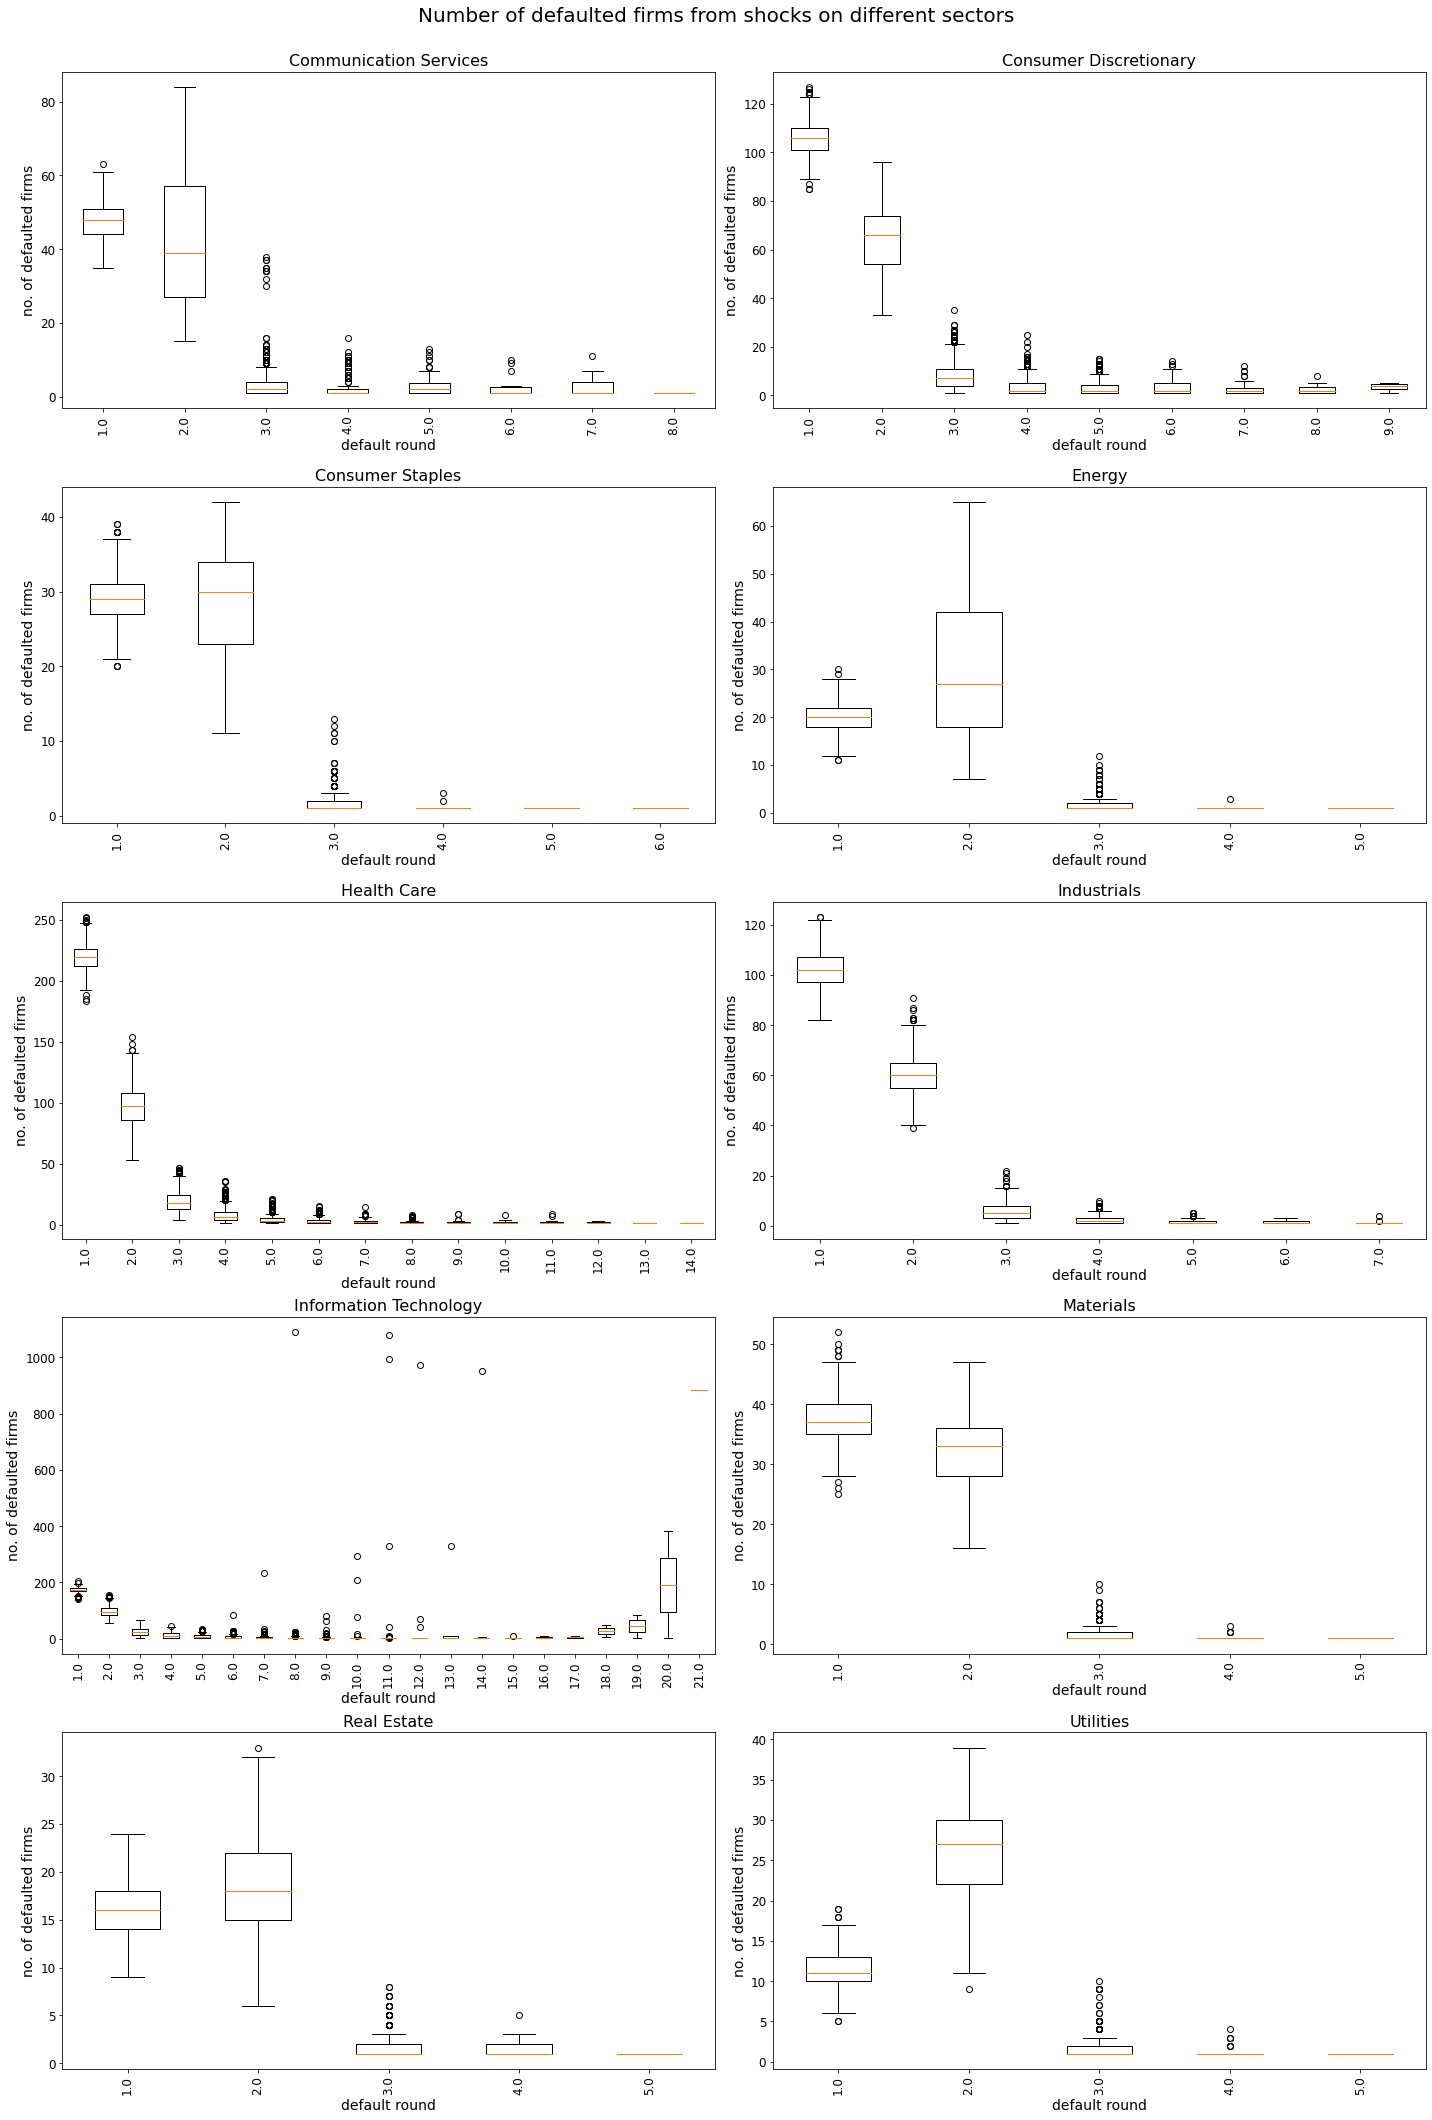

In [8]:
fig = plot_defaults(sectors_dict3, "all", 'rounds')

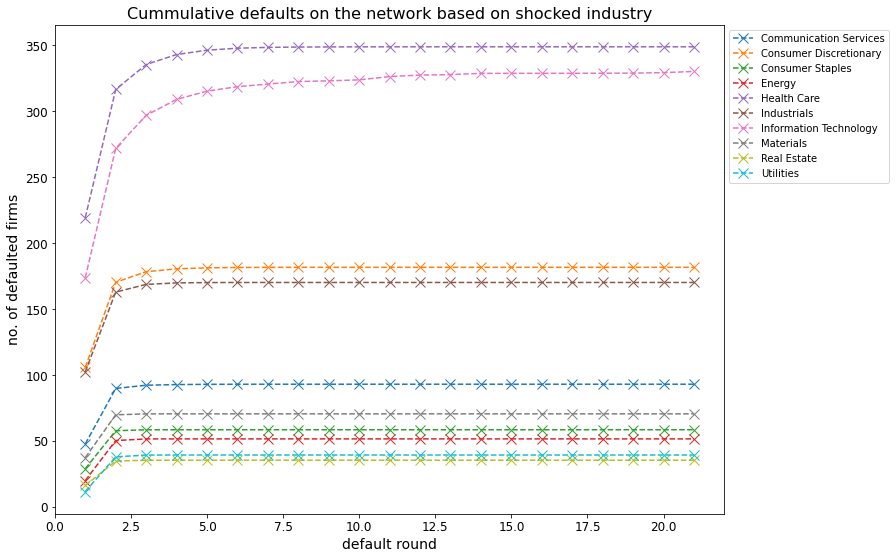

In [7]:
fig = plot_cummulative_defaults(sectors_dict3)

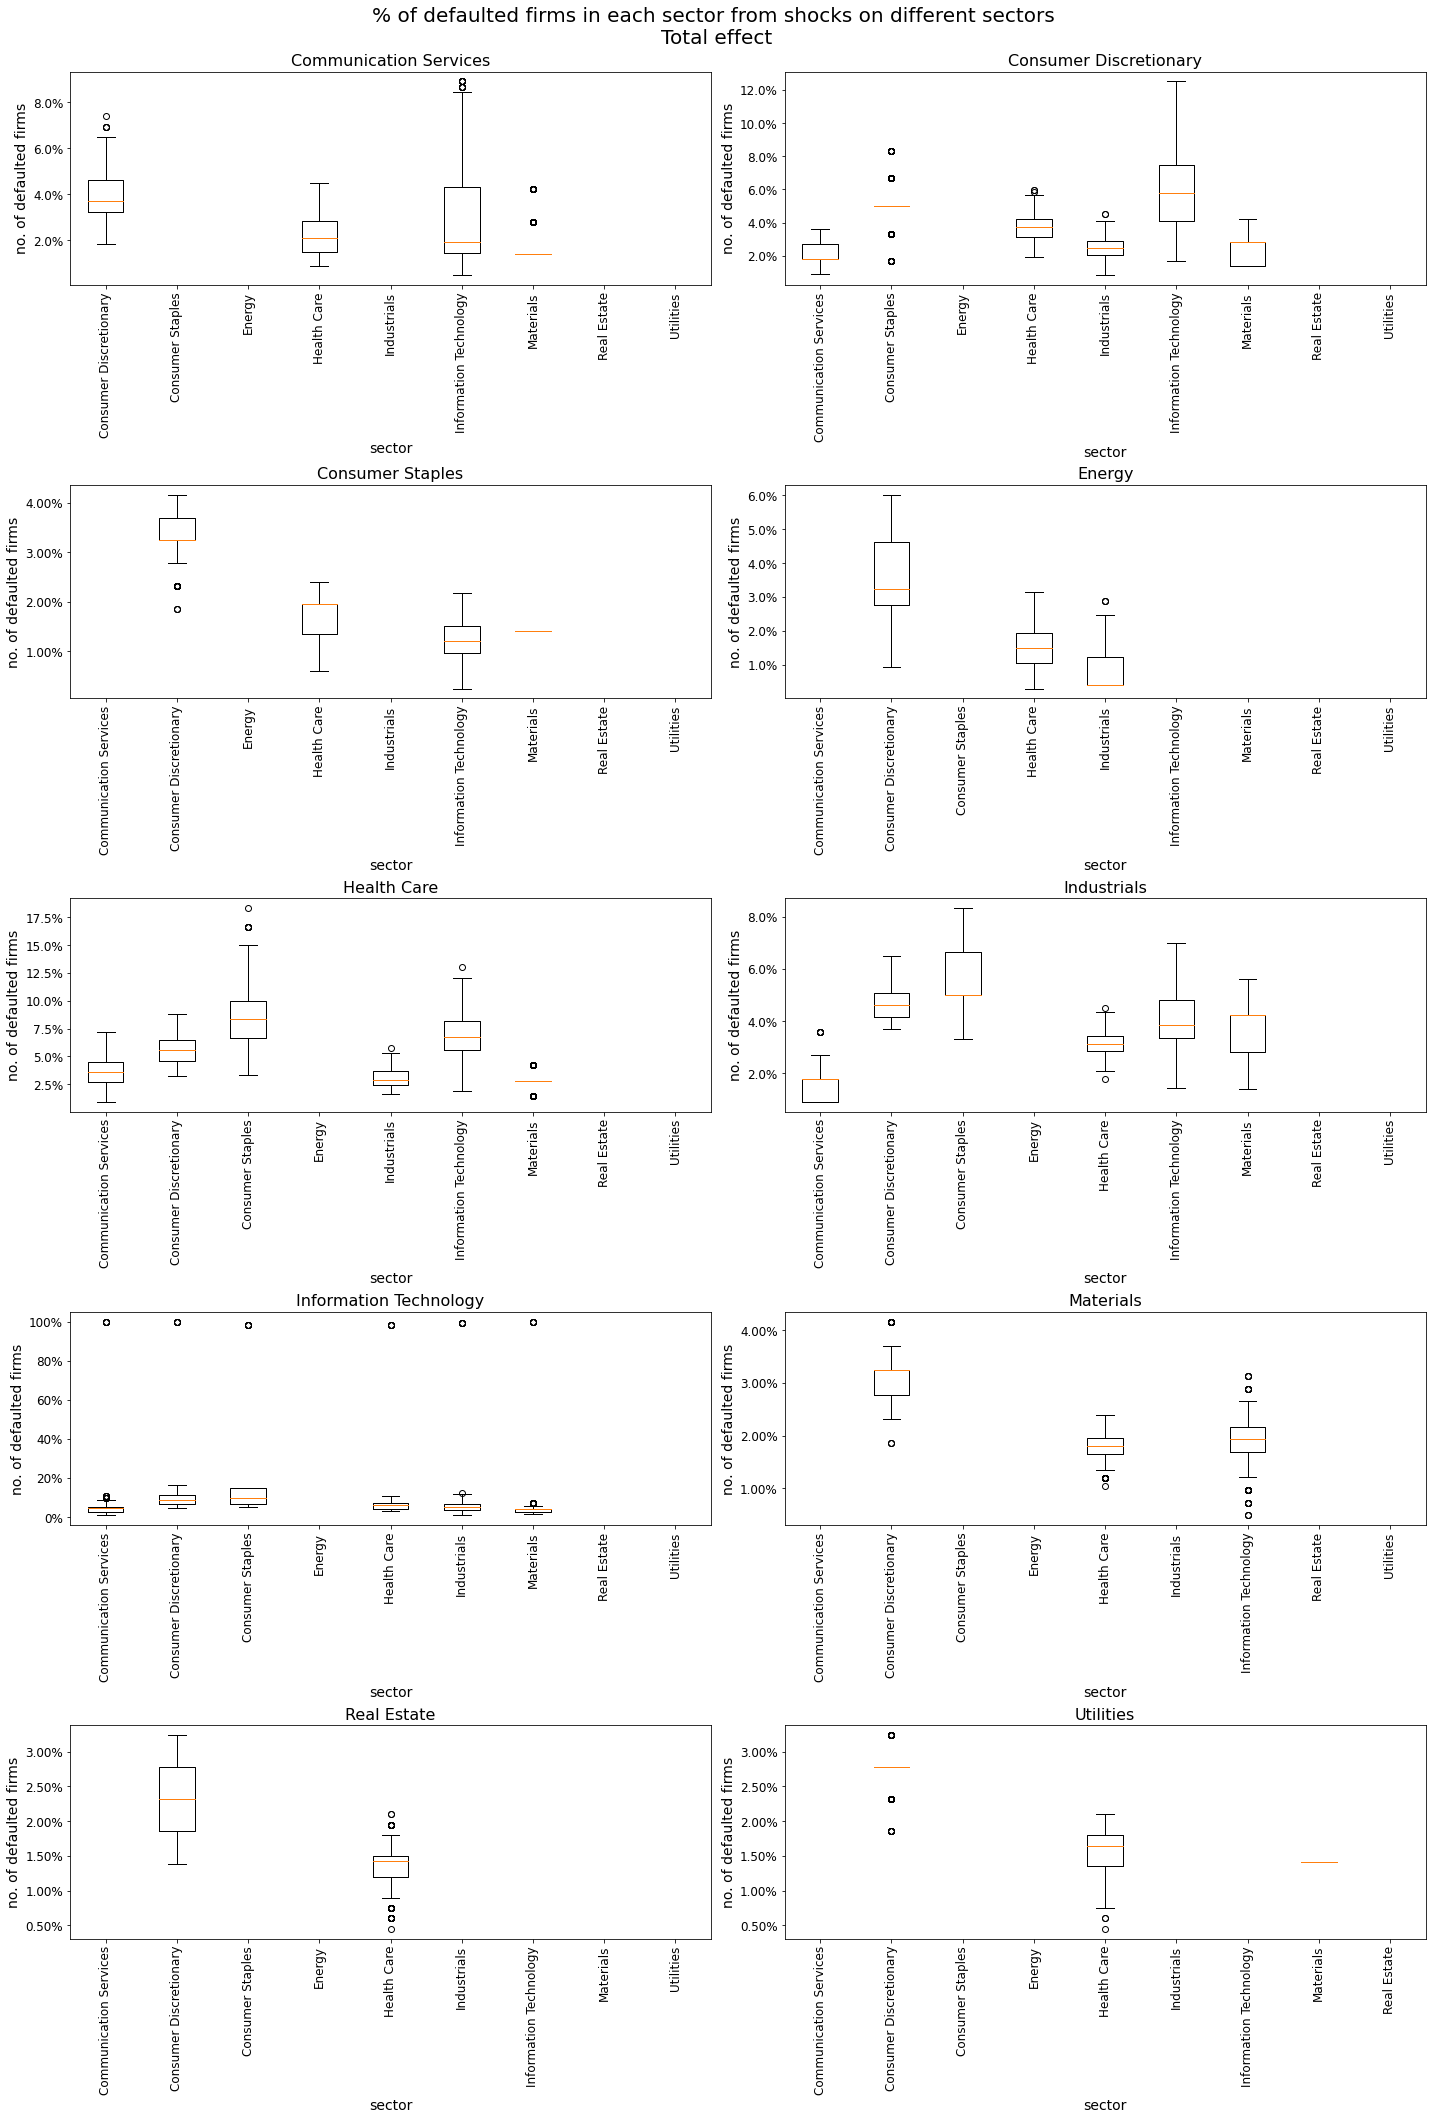

In [10]:
fig = plot_defaults(sectors_dict3, "all", 'sectors_total')

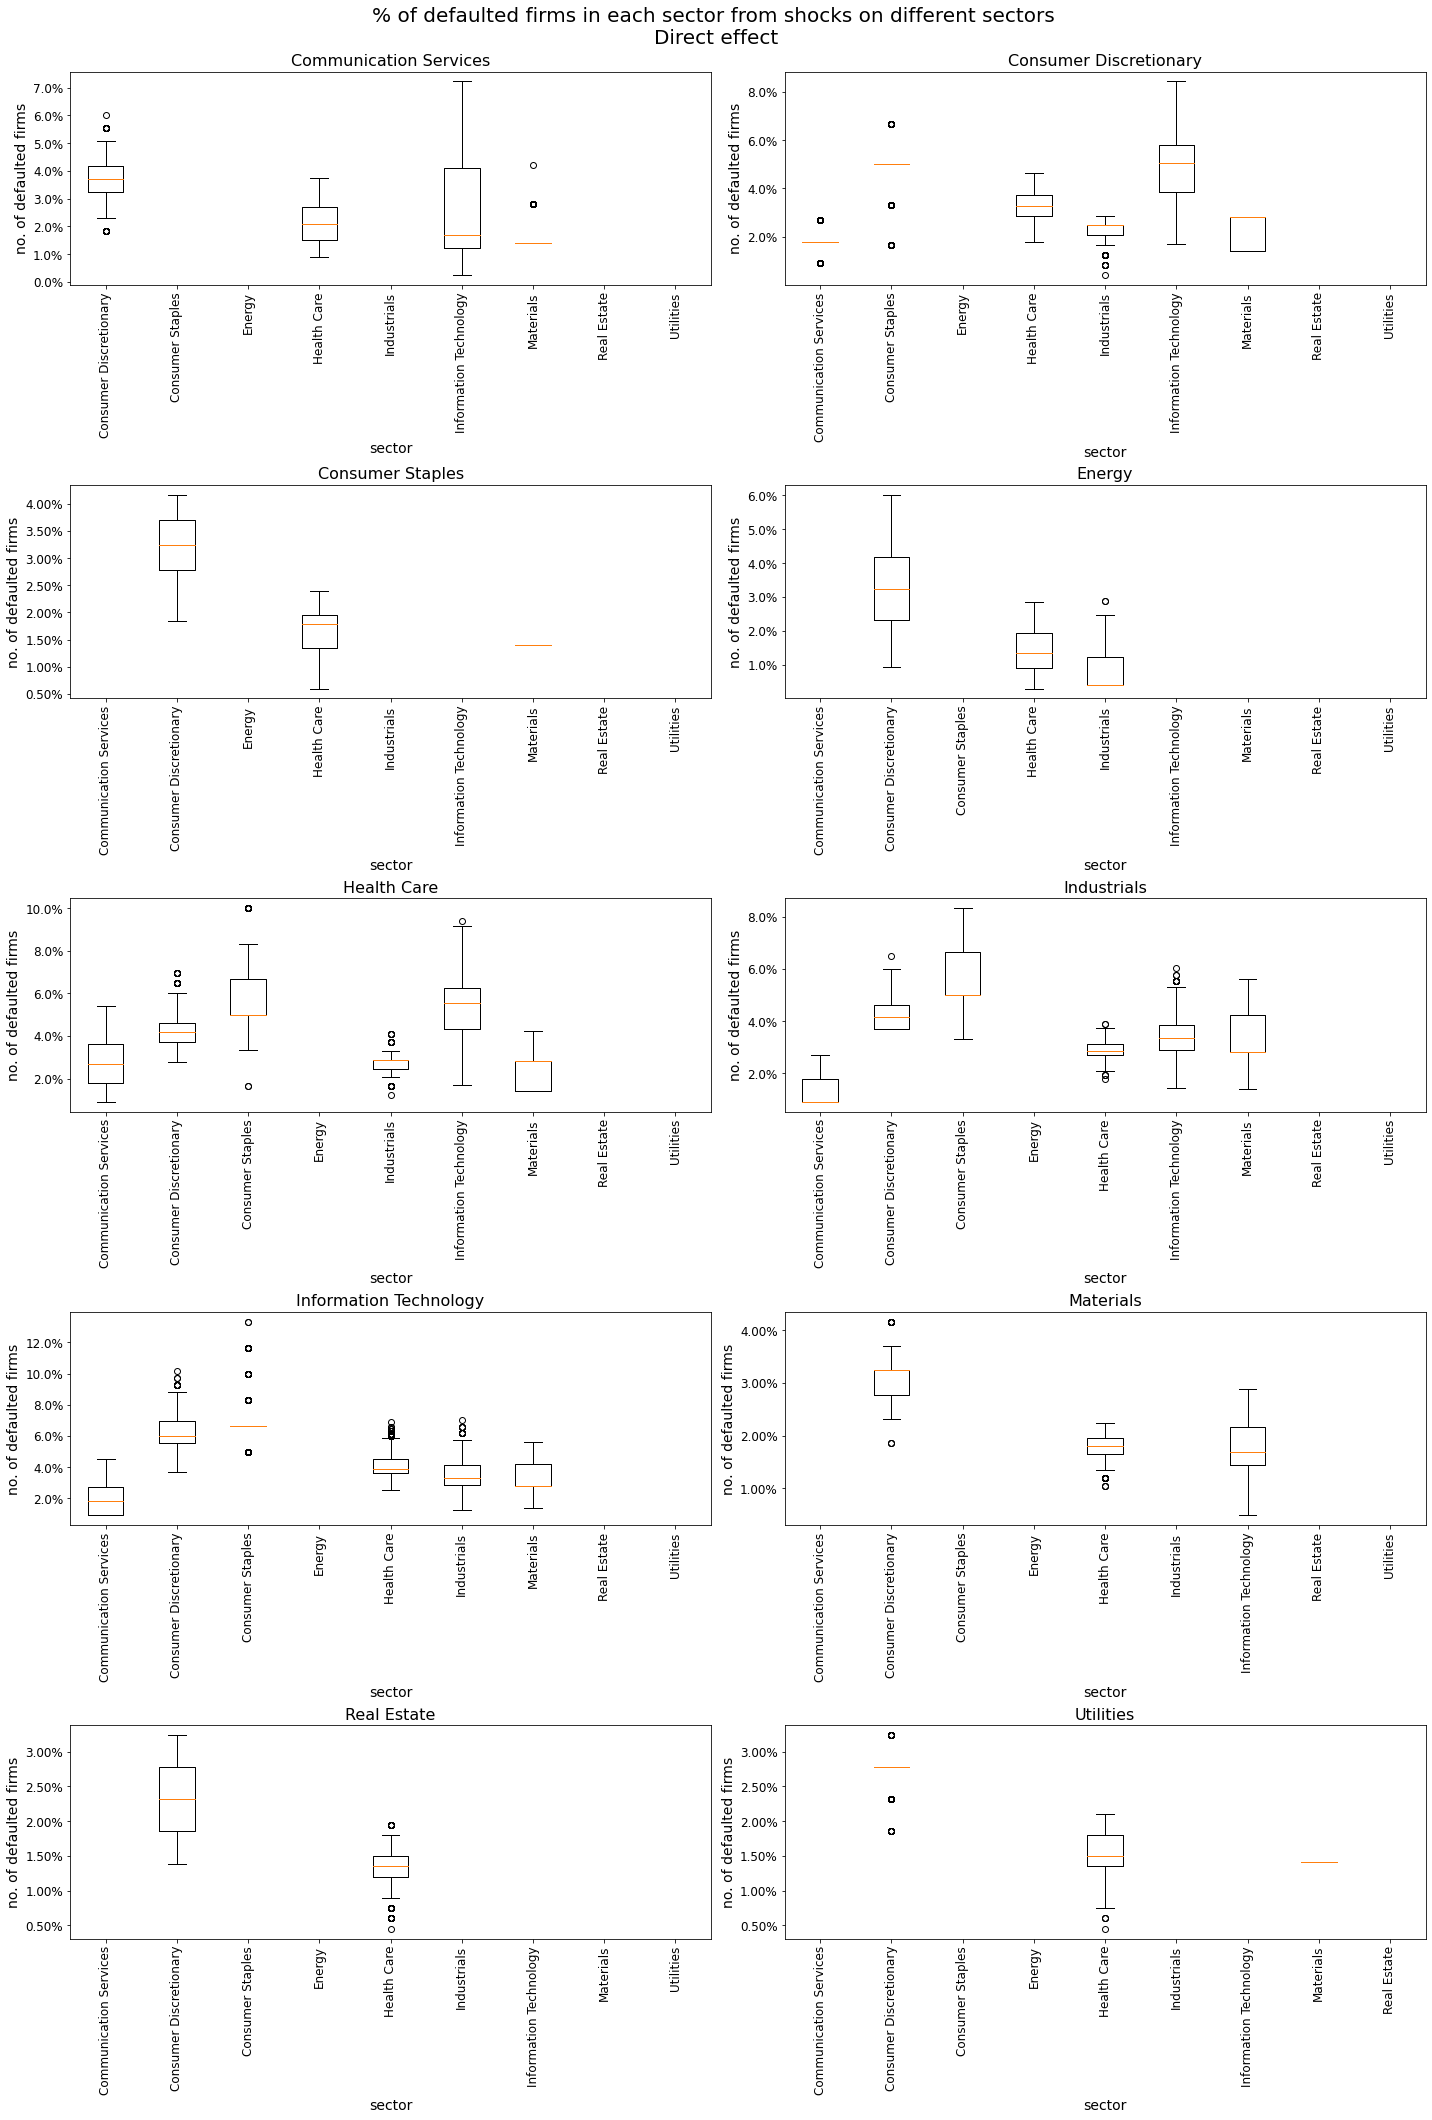

In [11]:
fig = plot_defaults(sectors_dict3, "all", 'sectors_direct')

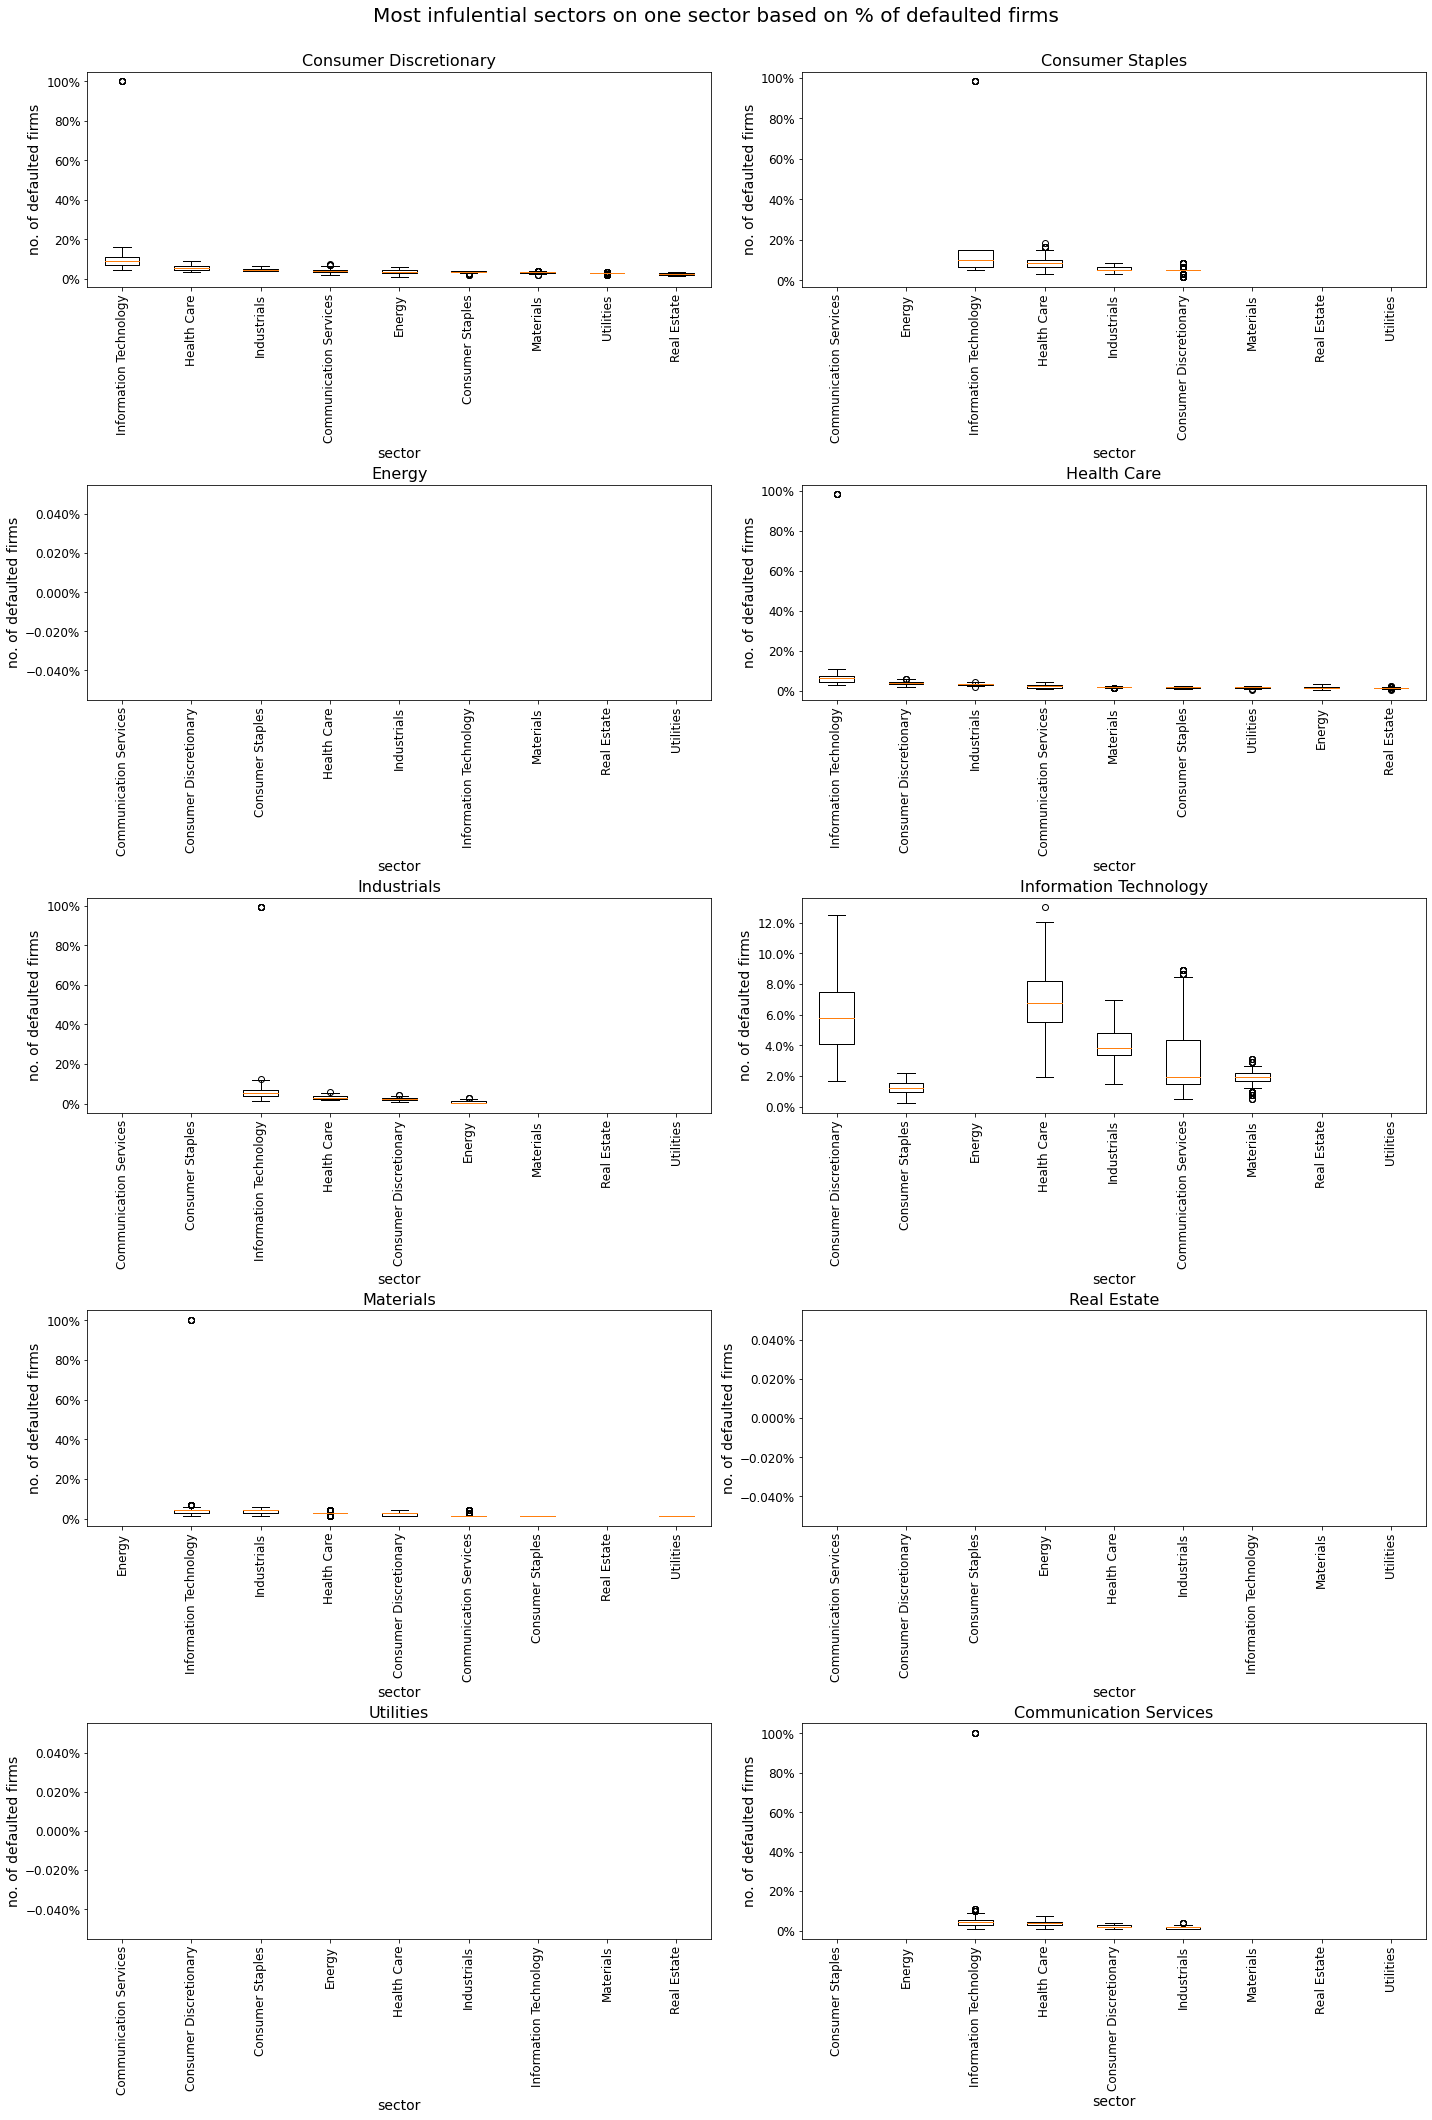

In [12]:
fig = plot_effect_on_sectors_from_other_sectors(sectors_dict3)

## 4th Model
parameters:
- distribution: pareto
- alpha: 1.3
- scale parameter: 0.1
- default threshold: 0.3 (if a firm loses 70% of their equity, they default)
- number of simulations: 1000

In [8]:
sectors_dict4 = load_simulation_for_all_sectors(config_dict["outputs"]["simulations"], "2022_10_31_192529", config_dict["lists"]["sectors"])

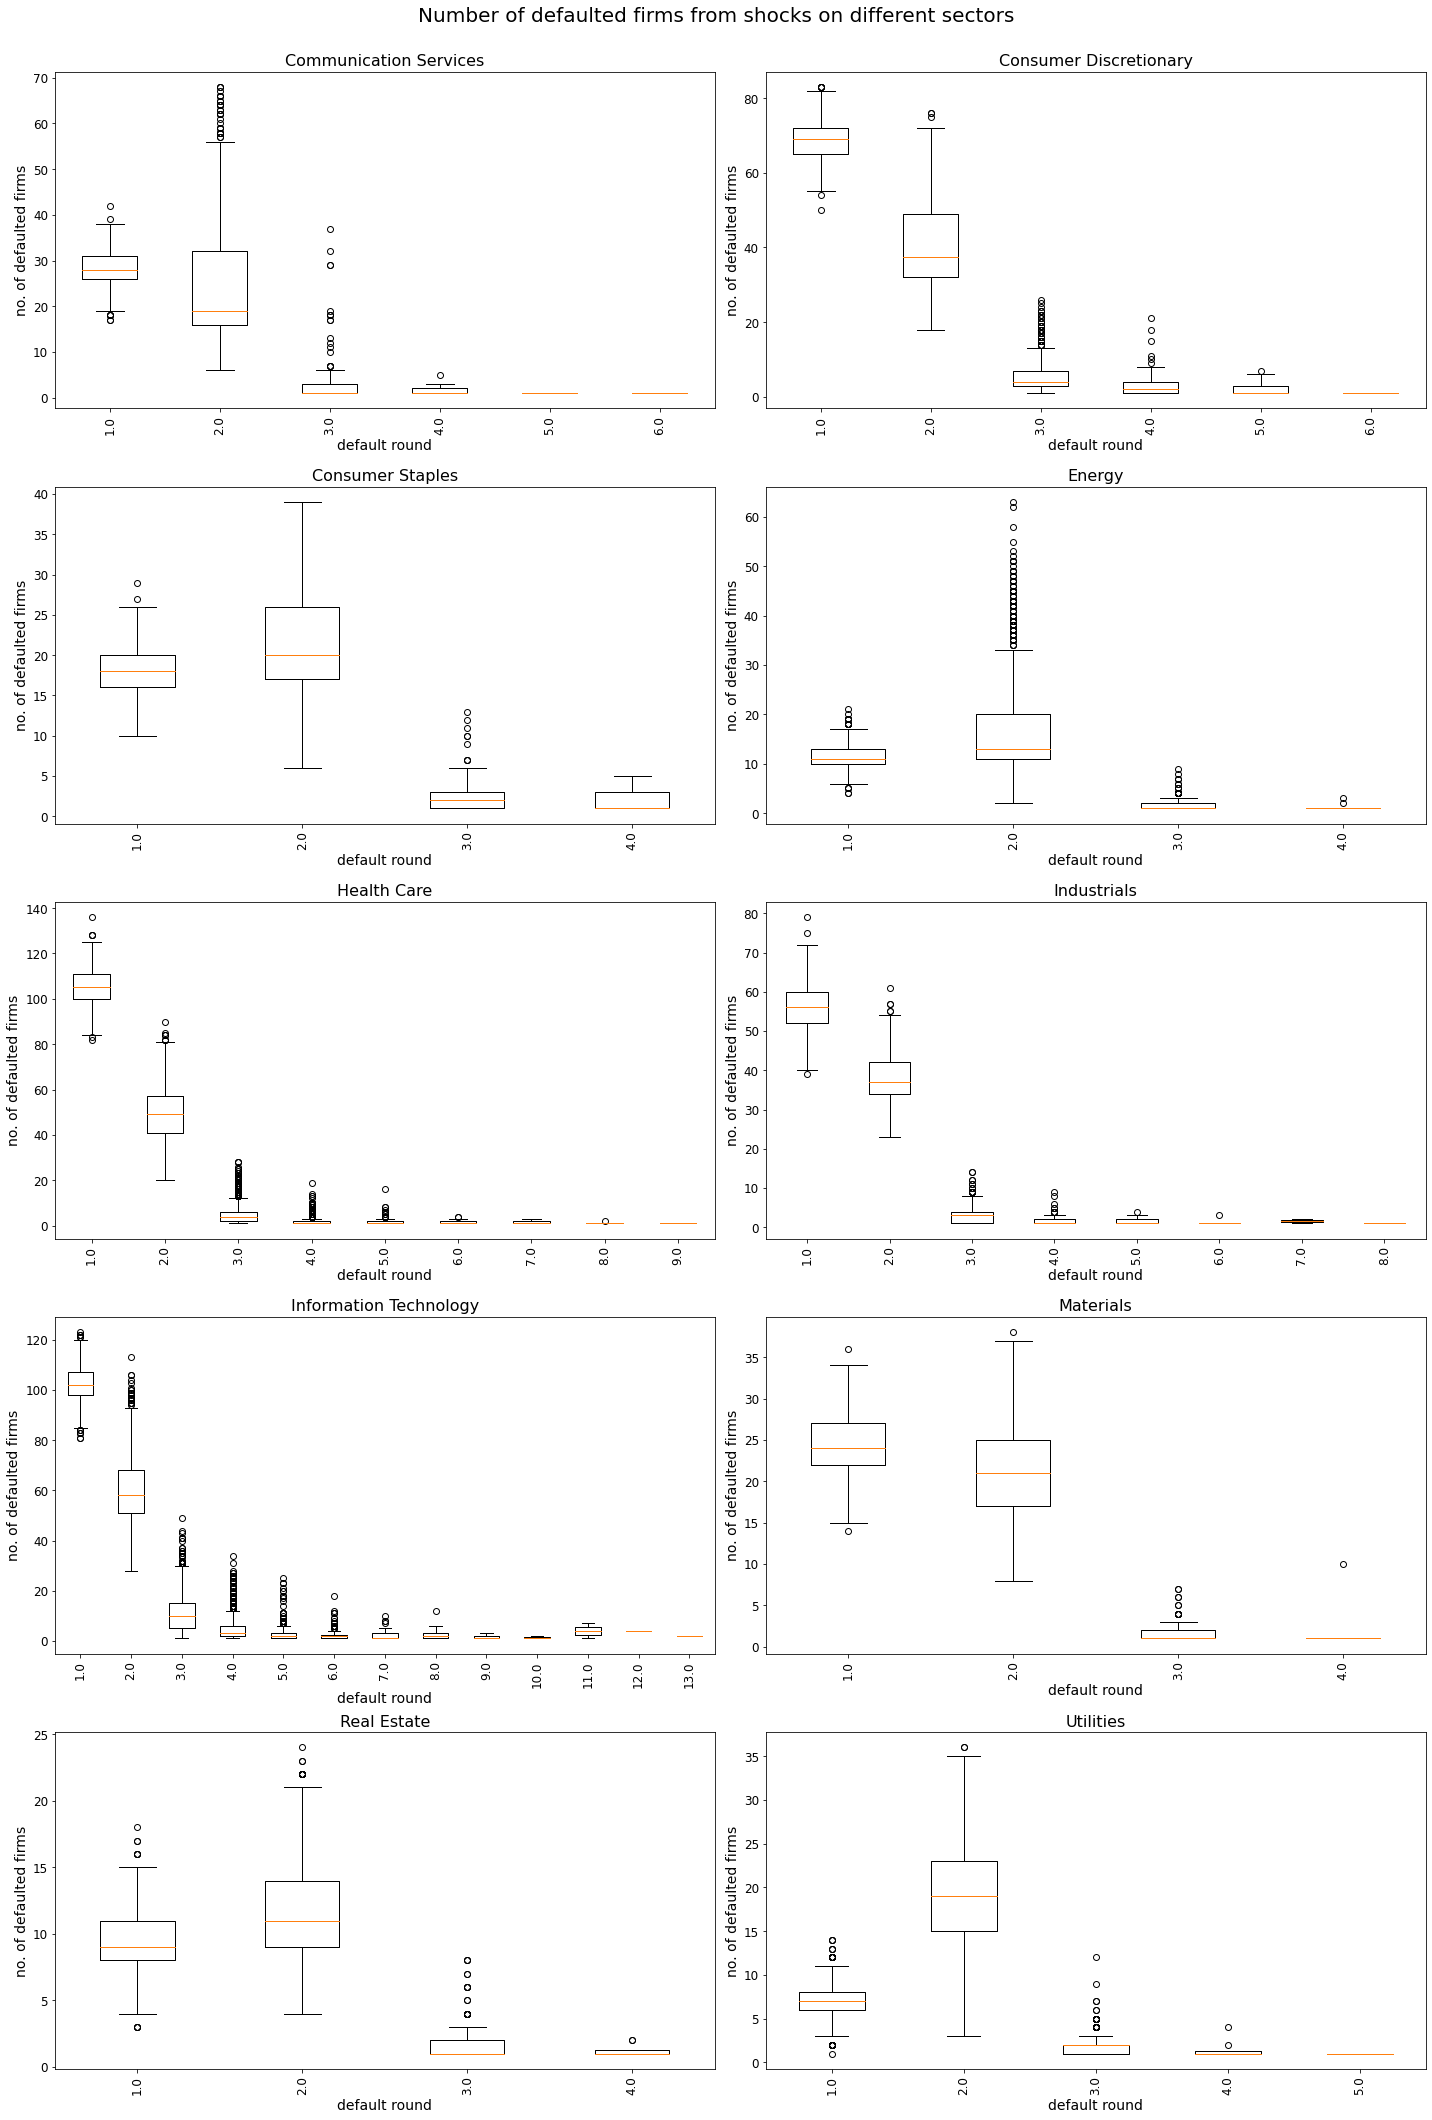

In [14]:
fig = plot_defaults(sectors_dict4, "all", 'rounds')

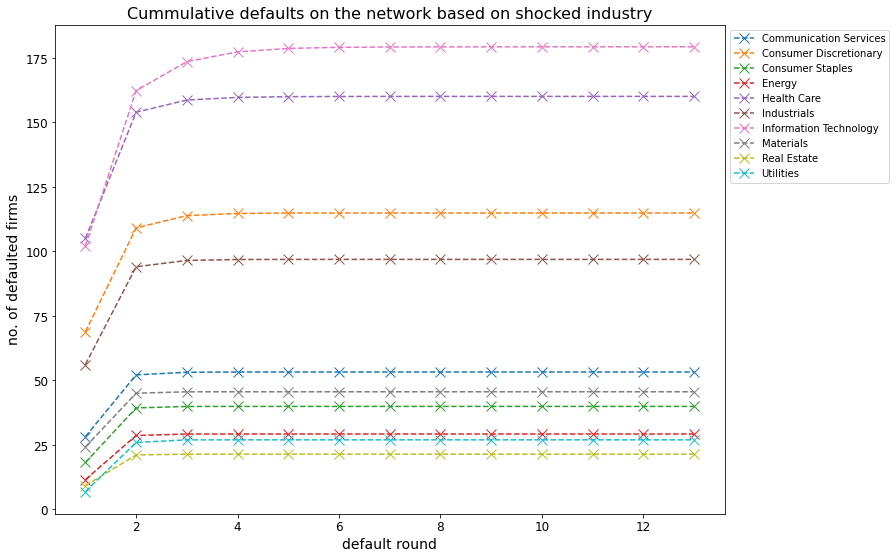

In [9]:
fig = plot_cummulative_defaults(sectors_dict4)

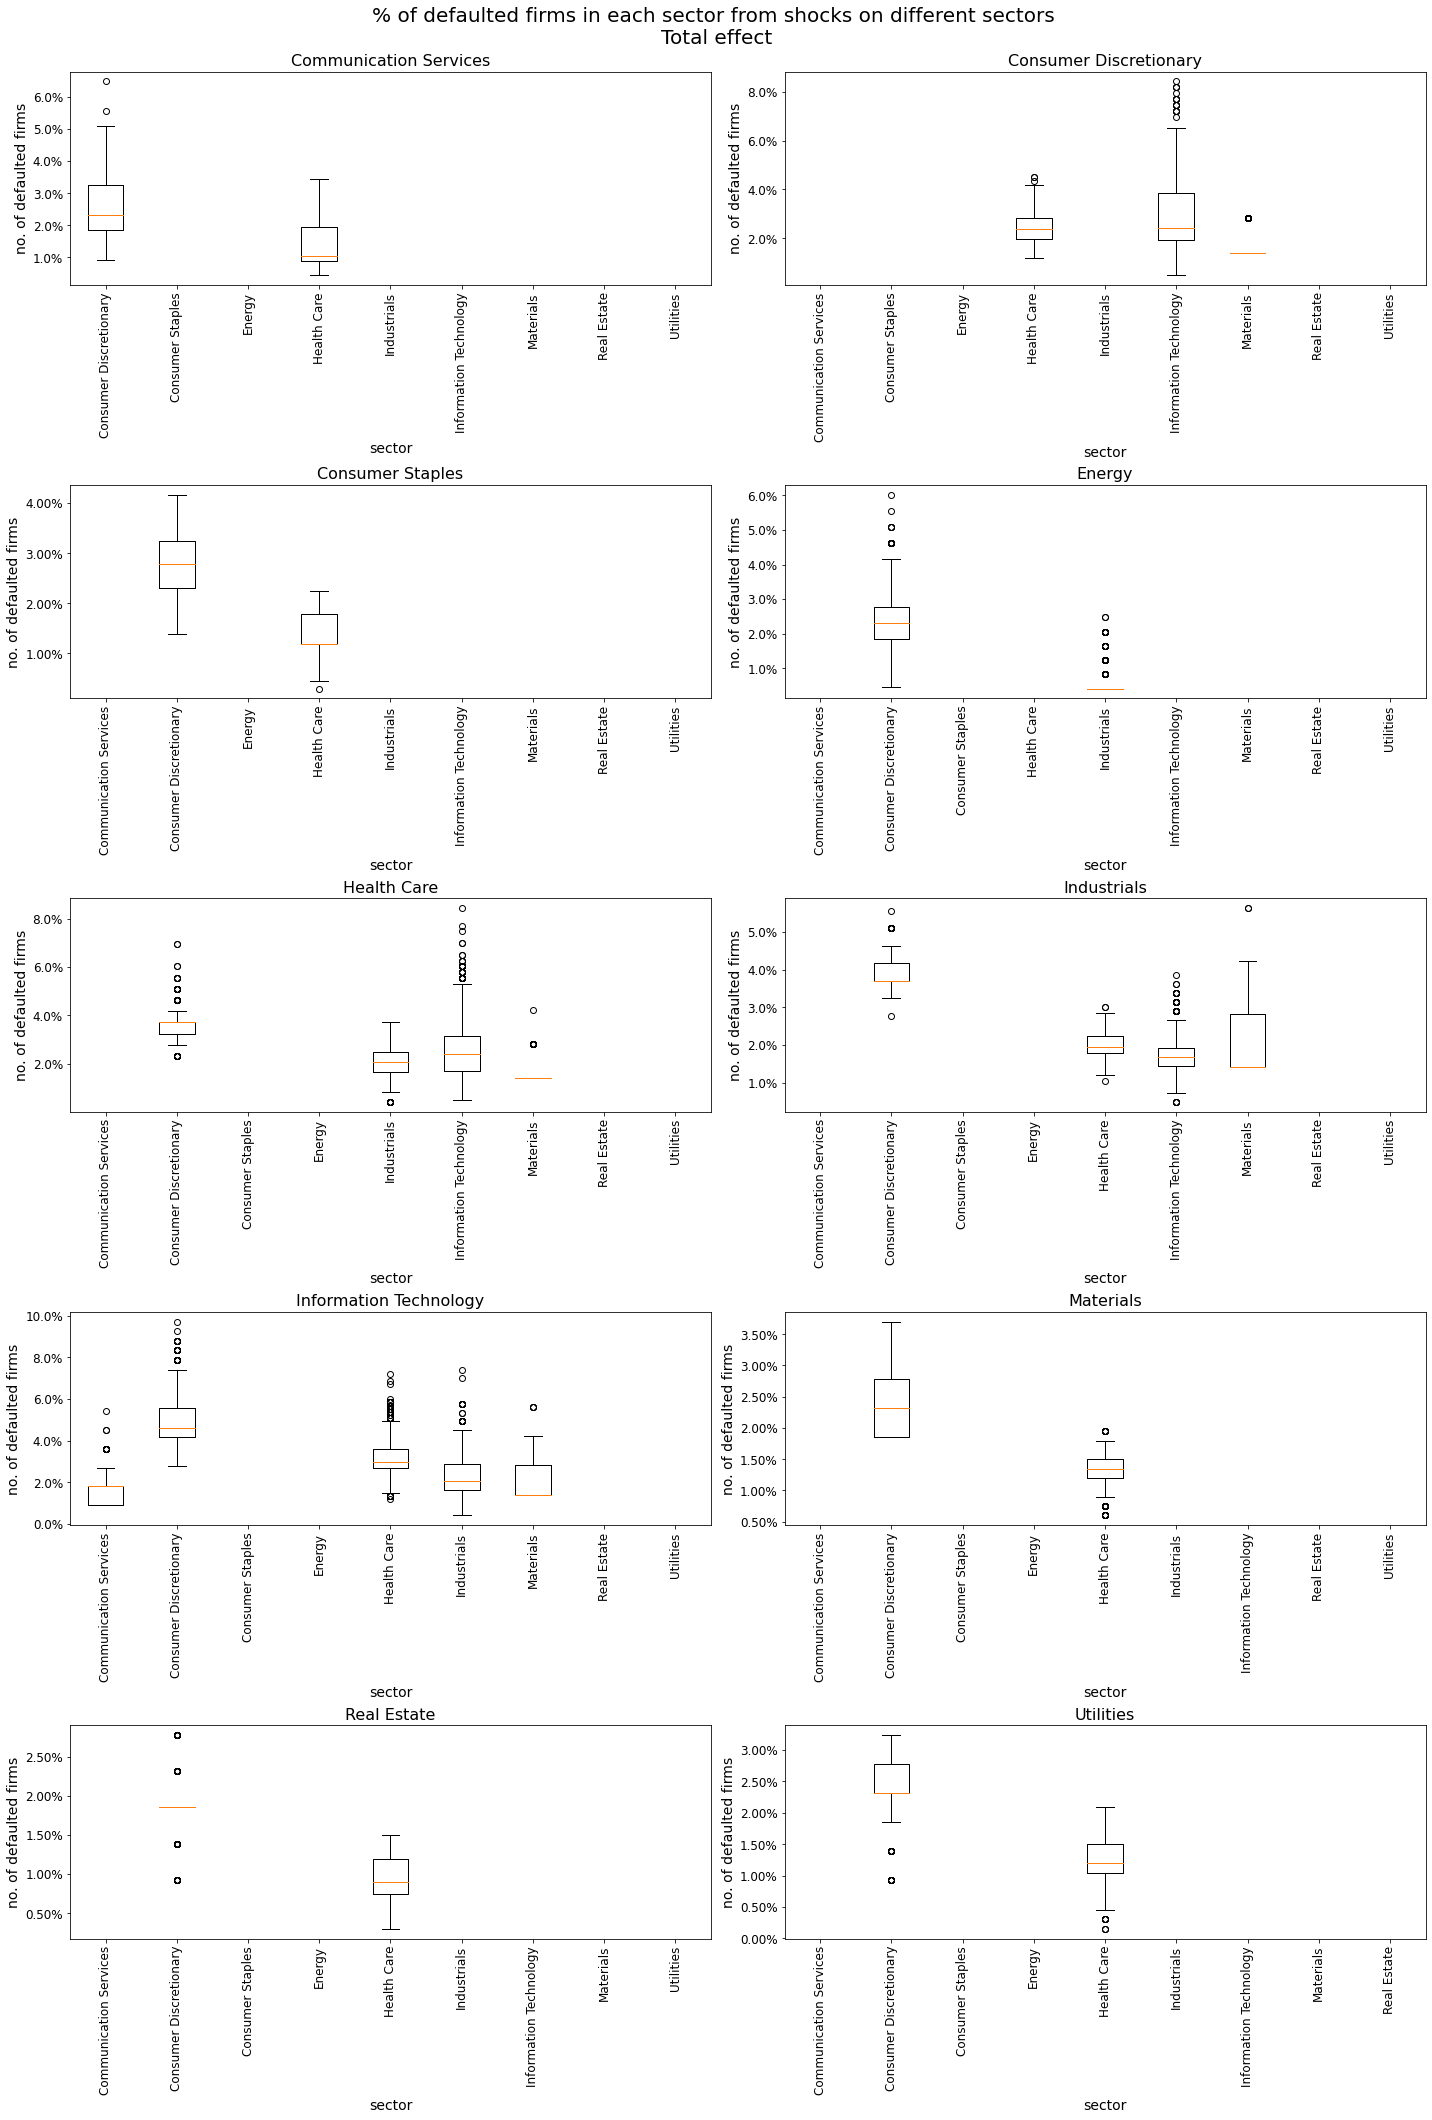

In [16]:
fig = plot_defaults(sectors_dict4, "all", 'sectors_total')

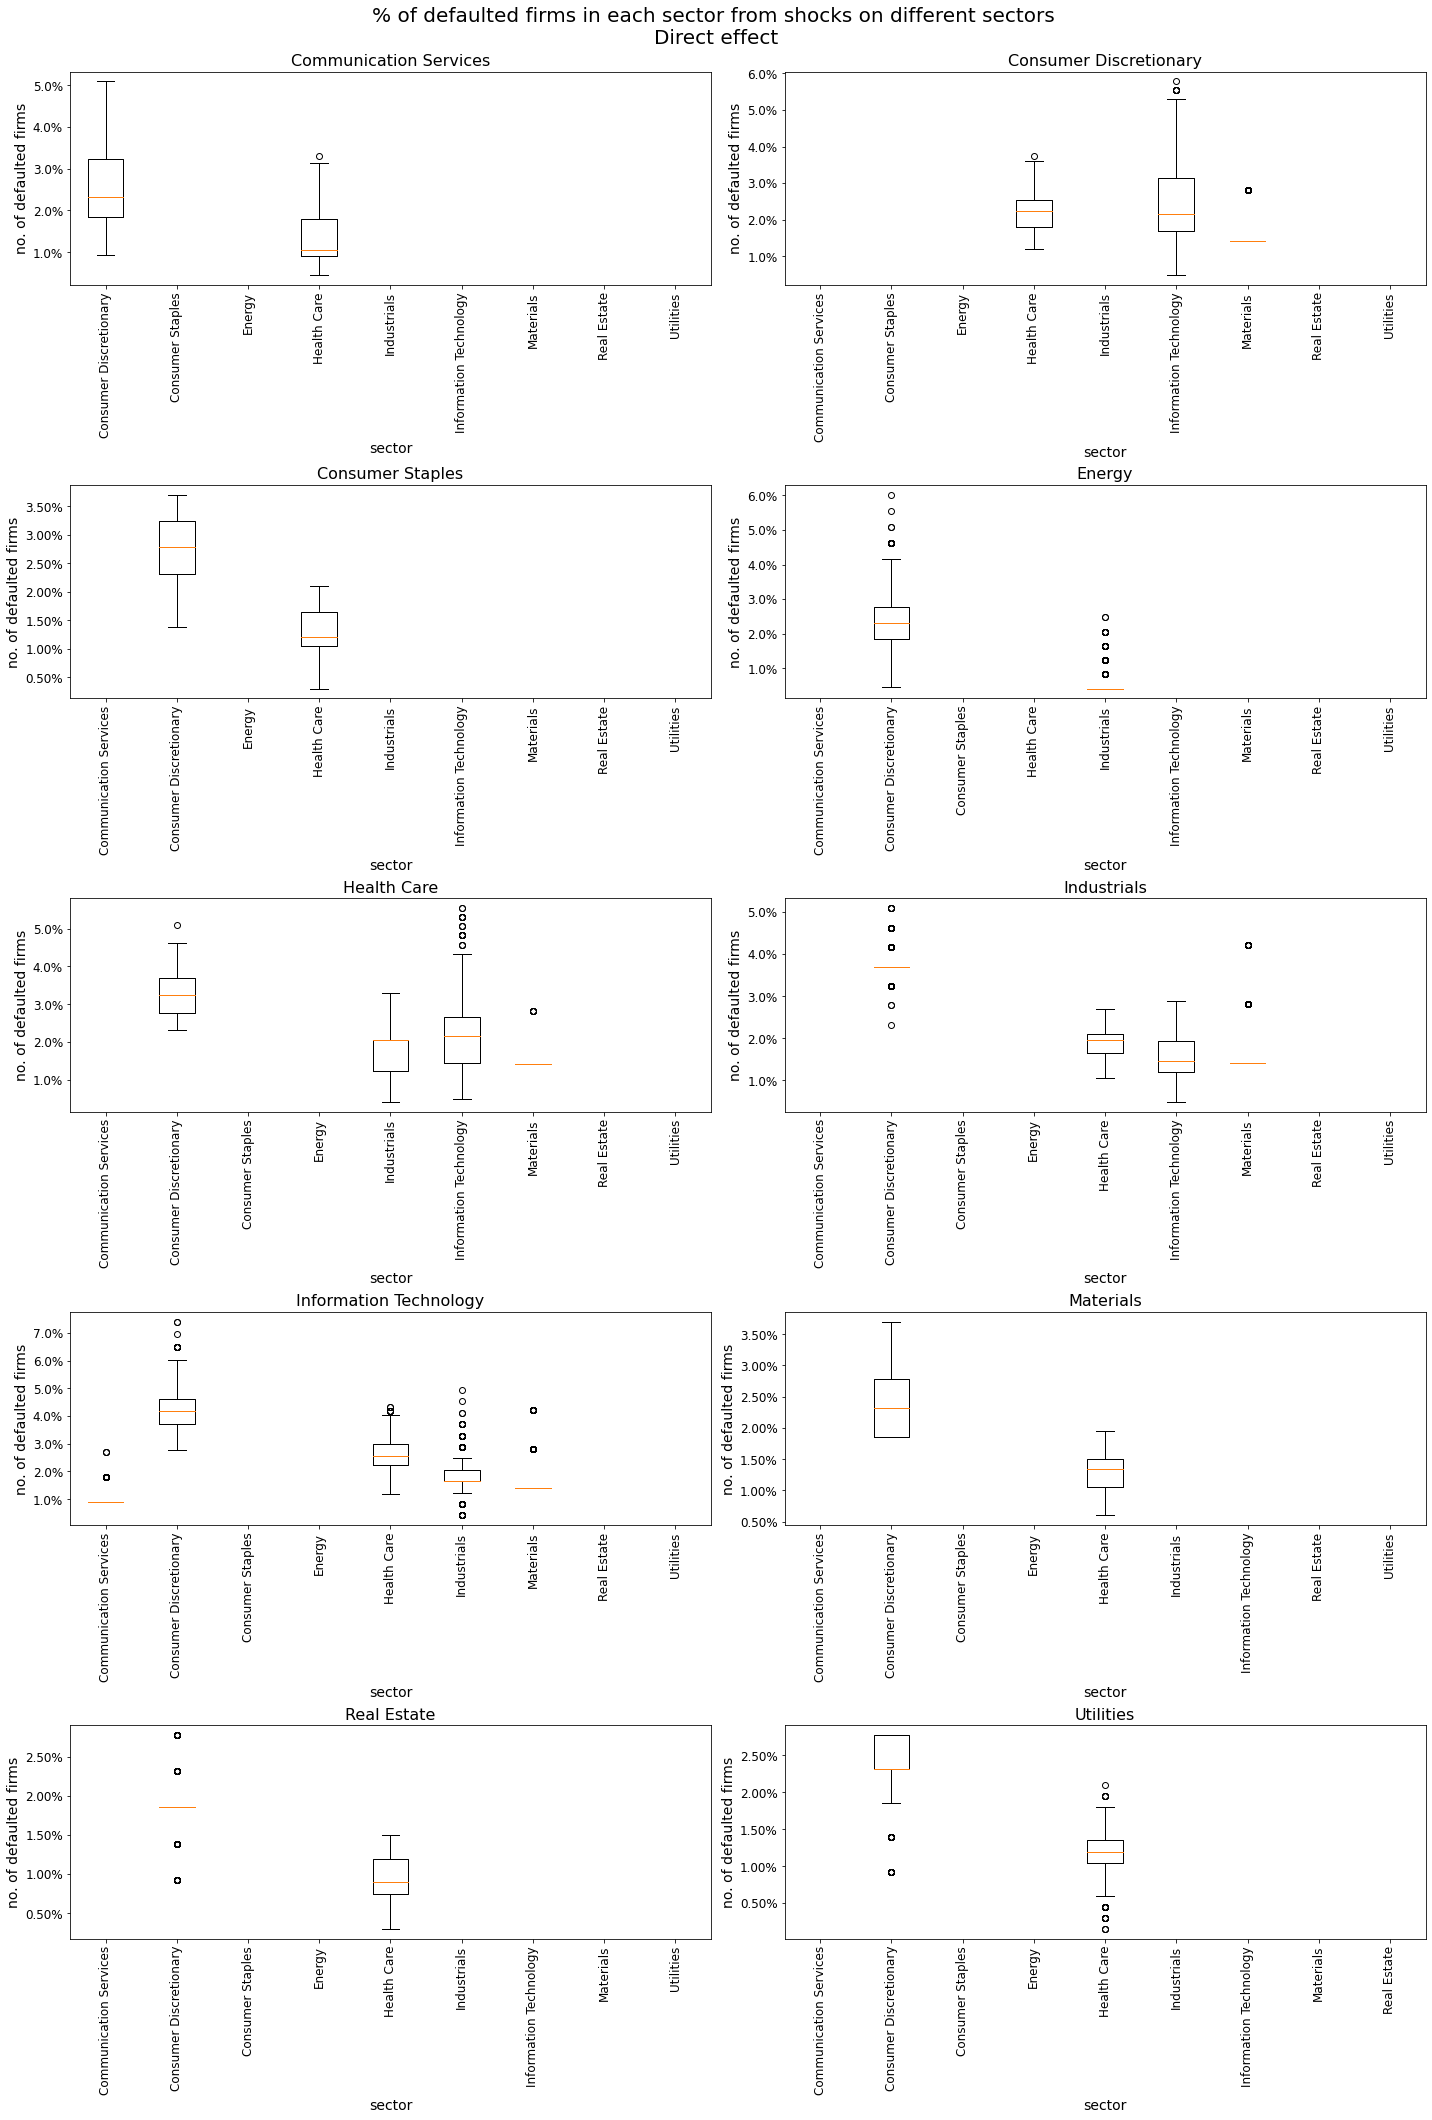

In [17]:
fig = plot_defaults(sectors_dict4, "all", 'sectors_direct')

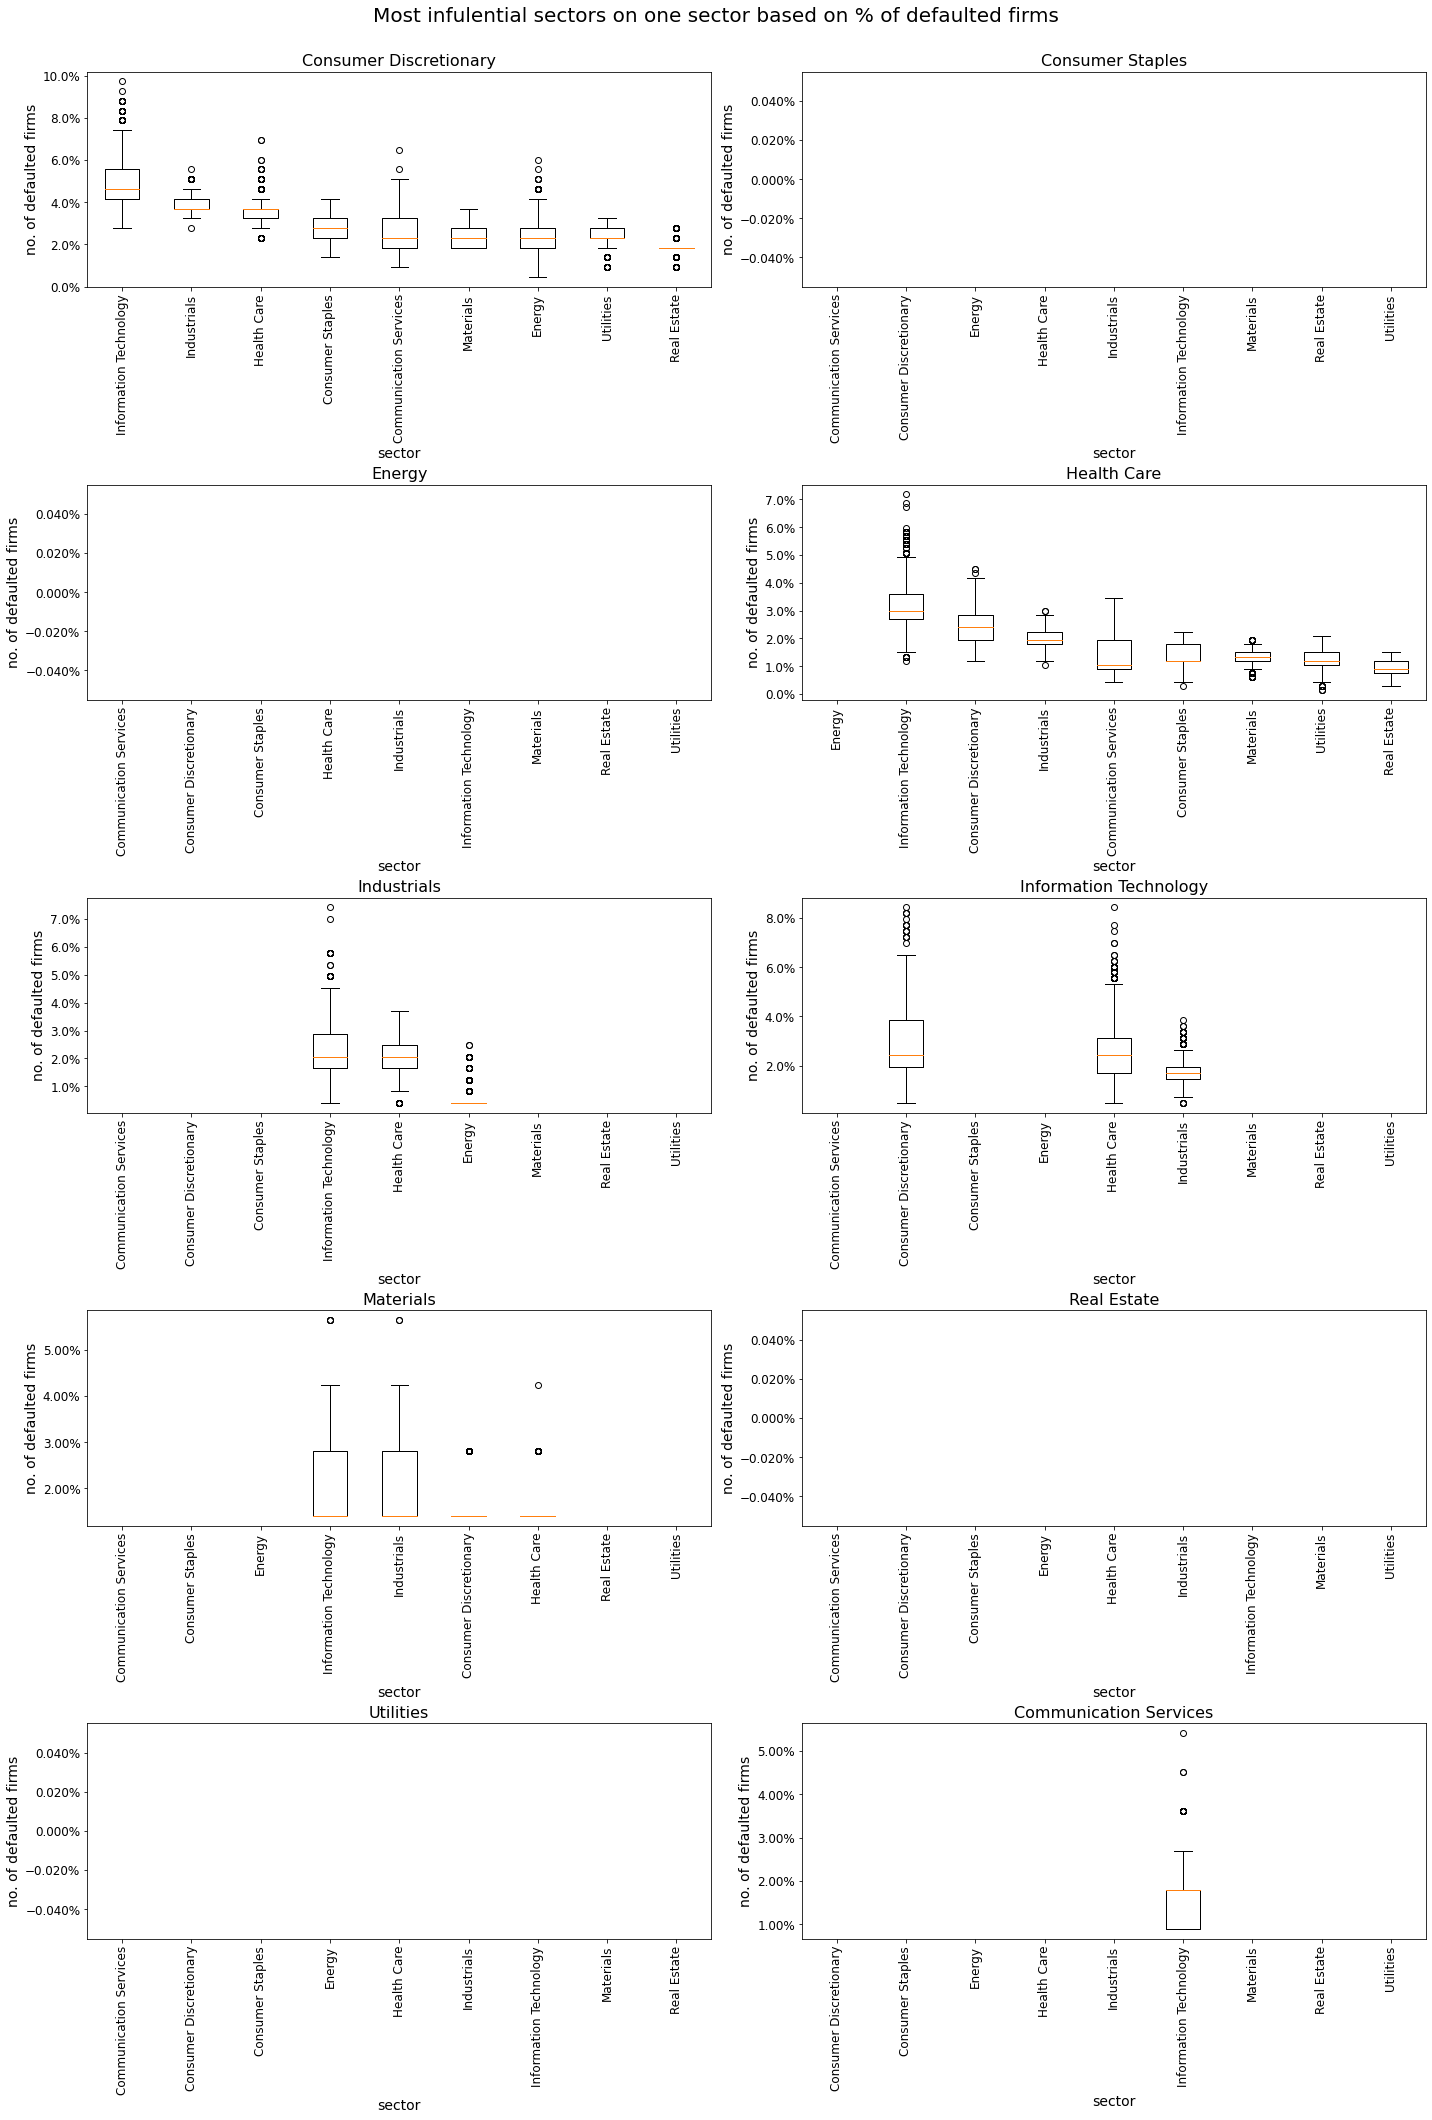

In [18]:
fig = plot_effect_on_sectors_from_other_sectors(sectors_dict4)